In [4]:
from google.colab import files
uploaded=files.upload()


Saving car_price.csv to car_price (1).csv


In [2]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)

In [5]:
# loading the dataset
df=pd.read_csv(io.BytesIO(uploaded['car_price.csv']))
df.head()

Unnamed: 0  Unnamed: 0.1   Brand   Model  Year    Fuel KM driven      Price
0           0             0  Maruti  Baleno  2020  Petrol  3,919 km  ₹6,63,299
1           1             1  Maruti    Eeco  2020  Petrol  1,999 km  ₹4,99,299
2           2             2  Maruti   IGNIS  2020  Petrol  3,142 km  ₹5,29,899
3           3             3  Maruti    Alto  2020  Petrol  1,322 km  ₹3,79,599
4           4             4  Maruti    Eeco  2019  Petrol  3,540 km  ₹4,75,099

In [6]:
# Looking for the feature name
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Brand', 'Model', 'Year', 'Fuel',
       'KM driven', 'Price'],
      dtype='object')

In [7]:
# Following columns are of no use in the dataset as it is only the count of total dataset
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [8]:
#Head of the dataset.
df.head()

Brand   Model  Year    Fuel KM driven      Price
0  Maruti  Baleno  2020  Petrol  3,919 km  ₹6,63,299
1  Maruti    Eeco  2020  Petrol  1,999 km  ₹4,99,299
2  Maruti   IGNIS  2020  Petrol  3,142 km  ₹5,29,899
3  Maruti    Alto  2020  Petrol  1,322 km  ₹3,79,599
4  Maruti    Eeco  2019  Petrol  3,540 km  ₹4,75,099

In [9]:
#Checked for the Data type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6705 entries, 0 to 6704
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      6705 non-null   object
 1   Model      6705 non-null   object
 2   Year       6705 non-null   int64 
 3   Fuel       6705 non-null   object
 4   KM driven  6705 non-null   object
 5   Price      6705 non-null   object
dtypes: int64(1), object(5)
memory usage: 314.4+ KB


We can see that, few features in the data like "KM driven" and "Price" are in object type which should have been in int types

In [10]:
#Trying to see any null values present or not
df.isnull().sum()

Brand        0
Model        0
Year         0
Fuel         0
KM driven    0
Price        0
dtype: int64

No Null values can be seen

In [11]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Renault', 'HYUNDAI', 'Honda',
       'Toyota', 'Mahindra', 'Nissan', 'Jeep', 'KIA', 'Ford', 'Landrover',
       'MG', 'Volkswagen', 'Tata', 'Chevrolet', 'Skoda', 'Audi', 'Fiat',
       'Mercedes', 'BMW', 'Ssangyong', 'Jaguar', 'TOYOTA', 'Mitsubishi'],
      dtype=object)

In [12]:
# Count of each data present
df['Brand'].value_counts()

Maruti        3297
Hyundai       1445
Honda          513
Toyota         343
Volkswagen     230
Mahindra       163
Renault        157
Ford           156
Tata           117
Skoda           50
Mercedes        32
Nissan          31
BMW             27
Chevrolet       27
Datsun          23
MG              19
Audi            19
Jeep            19
KIA             12
Fiat             7
Ssangyong        7
Mitsubishi       4
Jaguar           4
TOYOTA           1
Landrover        1
HYUNDAI          1
Name: Brand, dtype: int64

We can see one duplicate value "HYUNDAI" which should be "Hyundai"

In [13]:
# Searched for the row containing duplicate value
df[df['Brand']=='HYUNDAI']


Brand Model  Year    Fuel KM driven       Price
70  HYUNDAI   NEW  2020  Petrol  4,225 km  ₹11,24,899

In [14]:
#Replaced the duplicate with original
df['Brand'][df['Brand']=='HYUNDAI']='Hyundai'

In [15]:
# No duplicate values can be seen now.
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Renault', 'Honda', 'Toyota',
       'Mahindra', 'Nissan', 'Jeep', 'KIA', 'Ford', 'Landrover', 'MG',
       'Volkswagen', 'Tata', 'Chevrolet', 'Skoda', 'Audi', 'Fiat',
       'Mercedes', 'BMW', 'Ssangyong', 'Jaguar', 'TOYOTA', 'Mitsubishi'],
      dtype=object)

In [16]:
# Looking for the duplicate values
df['Model'].unique()

array(['Baleno', 'Eeco', 'IGNIS', 'Alto', 'Grand', 'Santro', 'Redi', 'Go',
       'Dzire', 'Swift', 'Wagon', 'Celerio', 'i10', 'Kwid', 'NEW',
       'VENUE', 'Jazz', 'Elite', 'Vitara', 'S', 'YARIS', 'XCENT', 'Eon',
       'XUV500', 'Micra', 'Verna', 'Compass', 'SELTOS', 'Creta',
       'Scorpio', 'Ecosport', 'Ertiga', 'Ciaz', 'XL6', 'City', 'Range',
       'New', 'HECTOR', 'Kuv100', 'WR-V', 'Polo', 'i20', 'Brio', 'OMNI',
       'Captur', 'Tiago', 'Amaze', 'Mobilio', 'Beat', 'Bolt', 'Ameo',
       'Lodgy', 'Figo', 'Spark', 'Ritz', 'Etios', 'Xcent', 'XUV', 'Zen',
       'Vento', 'TUV300', 'Superb', 'Hexa', 'GRAND', 'BR-V', 'Sunny', 'A',
       'Q3', 'Octavia', 'Xylo', 'Terrano', 'Innova', 'Omni', 'Corolla',
       'Duster', 'Avvventura', 'PUNTO', 'Benz', '3', 'Rapid', 'Tucson',
       'Thar', 'Accent', 'Nano', 'Aveo', 'Fabia', 'Pulse', 'Indica',
       'Fiesta', 'Indigo', 'Laura', 'A3', 'Zest', 'Fortuner', 'TRIBER',
       'TIGOR', 'Fluence', 'NEXON', 'Quanto', 'E2O', 'Bolero', 'Aria',
 

We can observe lot of duplicate values are present, so we need to rename/replace it to clean the data. Moreover, there are data which doesn't match with the other data and are not realistic. So we will drop it.

In [17]:
df['Model'][df['Model']== "['Alto', '800']"]='Alto'
df['Model'][df['Model']== "['Eeco']"]='Eeco'
df['Model'][df['Model']== "['Ecosport']"]='Ecosport'
df['Model'][df['Model']== "['Wagon', 'R']"]='Wagon'
df['Model'][df['Model']== "['S-presso']"]='S-presso'
df['Model'][df['Model']== "['Swift', 'Dzire']"]='Dzire'
df['Model'][df['Model']== "['Swift']"]='Swift'
df['Model'][df['Model']== "['City']"]='City'
df['Model'][df['Model']== "['Ritz']"]='Ritz'
df['Model'][df['Model']== "['Baleno']"]='Baleno'
df['Model'][df['Model']== "['Vento']"]='Vento'
df['Model'][df['Model']== "['Alto', 'K10']"]='Alto'
df['Model'][df['Model']== "['Amaze']"]='Amaze'
df['Model'][df['Model']== "['Eon']"]='Eon'
df['Model'][df['Model']== "['Grand', 'I10']"]='Grand'
df['Model'][df['Model']== "['Celerio']"]='Celerio'
df['Model'][df['Model']== "['Ameo']"]='Ameo'
df['Model'][df['Model']== "['I20']"]='i20'
df['Model'][df['Model']== "['Ciaz']"]='Ciaz'
df['Model'][df['Model']== "['I10']"]='i10'
df['Model'][df['Model']== "['Ignis']"]='IGNIS'
df['Model'][df['Model']== "['Verna']"]='Verna'
df['Model'][df['Model']== "['Vitara', 'Brezza']"]='Vitara'
df['Model'][df['Model']== "['Wr-v']"]='WR-V'
df['Model'][df['Model']== "['Triber']"]='TRIBER'
df['Model'][df['Model']== "['Polo']"]='Polo'
df['Model'][df['Model']== "['Venue']"]='VENUE'
df['Model'][df['Model']== "['Creta']"]='Creta'
df['Model'][df['Model']== "['Kwid']"]='Kwid'
df['Model'][df['Model']== "['Corolla', 'Altis']"]='Corolla Altis'
df['Model'][df['Model']== "['Brio']"]='Brio'
df['Model'][df['Model']== "['Tiago']"]='Tiago'
df['Model'][df['Model']== "['Beat']"]='Beat'
df['Model'][df['Model']== "['Xuv300']"]='XUV'
df['Model'][df['Model']== "['Kuv', '100']"]='Kuv100'

In [18]:
df['Model'][df['Model']== "['Innova']"]='Innova'
df['Model'][df['Model']== "S"]='S-Cross'
df['Model'][df['Model']== "XCENT"]='Xcent'
df['Model'][df['Model']== "GRAND"]='Grand'
df['Model'][df['Model']== "A"]='Alto'
df['Model'][df['Model']== "OMNI"]='Omni'
df['Model'][df['Model']== "Corolla"]='Corolla Altis'
df['Model'][df['Model']== "3"]='3 Series'
df['Model'][df['Model']== "5"]='5 Series'
df['Model'][df['Model']== "Wagon"]='WagonR'

In [19]:
df.drop(df[df['Model']=='NEW'].index,inplace=True)

In [20]:
df.drop(df[df['Model']=='New'].index,inplace=True)

In [21]:
pd.DataFrame(df['Model'].unique())

0
0           Baleno
1             Eeco
2            IGNIS
3             Alto
4            Grand
5           Santro
6             Redi
7               Go
8            Dzire
9            Swift
10          WagonR
11         Celerio
12             i10
13            Kwid
14           VENUE
15            Jazz
16           Elite
17          Vitara
18         S-Cross
19           YARIS
20           Xcent
21             Eon
22          XUV500
23           Micra
24           Verna
25         Compass
26          SELTOS
27           Creta
28         Scorpio
29        Ecosport
30          Ertiga
31            Ciaz
32             XL6
33            City
34           Range
35          HECTOR
36          Kuv100
37            WR-V
38            Polo
39             i20
40            Brio
41            Omni
42          Captur
43           Tiago
44           Amaze
45         Mobilio
46            Beat
47            Bolt
48            Ameo
49           Lodgy
50            Figo
51           Spark
52            Ritz
53           Etios
54             XUV
55             Zen
56           Vento
57          TUV300
58          Superb
59            Hexa
60            BR-V
61           Sunny
62              Q3
63         Octavia
64            Xylo
65         Terrano
66          Innova
67   Corolla Altis
68          Duster
69      Avvventura
70           PUNTO
71            Benz
72        3 Series
73           Rapid
74          Tucson
75            Thar
76          Accent
77            Nano
78            Aveo
79           Fabia
80           Pulse
81          Indica
82          Fiesta
83          Indigo
84           Laura
85              A3
86            Zest
87        Fortuner
88          TRIBER
89           TIGOR
90         Fluence
91           NEXON
92          Quanto
93             E2O
94          Bolero
95            Aria
96           Civic
97         Harrier
98          Rexton
99             CRV
100         Glanza
101          Jetta
102          Santa
103             X1
104       5 Series
105         Accord
106             A4
107           AURA
108          URBAN
109             XF
110      FREESTYLE
111        Elantra
112          Cruze
113            SX4
114             FJ
115         Pajero
116           Sail
117             XJ
118         Passat
119           Land
120         Safari
121          Scala
122          Punto
123             X3
124             A6
125        MARAZZO
126      Outlander
127      NUVOSPORT
128          SONET
129      Endeavour
130       S-presso

So, we have corrected all the duplicate values in our data set and also dropped "New" and "NEW" from the model features as it as there is no model of vehicle name "NEW" or "New". It was having mixed data which would make the model confused. Here we can also see 131 unique values for the feature name "Model"

In [22]:
# Checked for the unique values in 
df['Fuel'].unique()

array(['Petrol', 'Petrol + CNG', 'Diesel', 'Petrol + LPG', 'Electric',
       'CNG'], dtype=object)

In [23]:
# Checked the values of the feature "Fuel"
df['Fuel'].value_counts()

Petrol          4308
Diesel          2114
Petrol + CNG     200
Petrol + LPG      22
CNG                4
Electric           3
Name: Fuel, dtype: int64

In [24]:
df['Price'].unique()

array(['₹6,63,299', '₹4,99,299', '₹5,29,899', ..., '2,55,203', '5,30,000',
       '6,03,500'], dtype=object)

In [25]:
# The price symbol and the comma in between amount is removed.
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('₹', '')

In [26]:
# The data type is changed from object type to float type.
df['Price'] = df['Price'].astype('float')

In [27]:
# Removed the string element from the data. km/kms and comma(,) is replaced with space.
df['KM driven']=df['KM driven'].str.replace(',','')
df['KM driven']=df['KM driven'].str.replace('[kms]','')

In [28]:
# The data type is changed from object type to float type.
df['KM driven']=df['KM driven'].astype('float')

In [29]:
df.head(10)

Brand   Model  Year    Fuel  KM driven     Price
0  Maruti  Baleno  2020  Petrol     3919.0  663299.0
1  Maruti    Eeco  2020  Petrol     1999.0  499299.0
2  Maruti   IGNIS  2020  Petrol     3142.0  529899.0
3  Maruti    Alto  2020  Petrol     1322.0  379599.0
4  Maruti    Eeco  2019  Petrol     3540.0  475099.0
5  Maruti    Alto  2020  Petrol      840.0  411799.0
6  Maruti    Eeco  2020  Petrol    16285.0  468299.0
7  Maruti    Eeco  2020  Petrol    16508.0  452199.0
8  Maruti    Eeco  2020  Petrol     5968.0  458099.0
9  Maruti    Alto  2020  Petrol     3772.0  402699.0

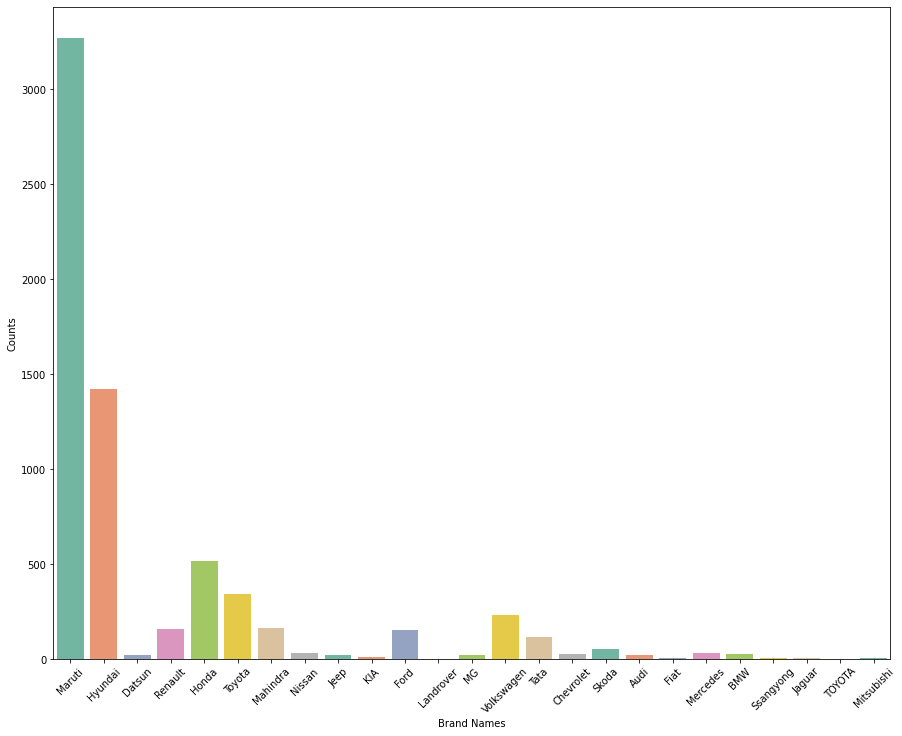

Maruti        3271
Hyundai       1420
Honda          513
Toyota         343
Volkswagen     230
Mahindra       163
Renault        157
Ford           154
Tata           117
Skoda           50
Mercedes        32
Nissan          31
BMW             27
Chevrolet       27
Datsun          23
Jeep            19
MG              19
Audi            19
KIA             12
Fiat             7
Ssangyong        7
Mitsubishi       4
Jaguar           4
TOYOTA           1
Landrover        1
Name: Brand, dtype: int64


In [30]:
plt.figure(figsize=(15,12))
sns.countplot(x='Brand',data=df,palette='Set2')
plt.xlabel("Brand Names")
plt.xticks(rotation='45')
plt.ylabel("Counts")
plt.show()

print(df['Brand'].value_counts())

Maruti cars are more for sell compare to other brands.

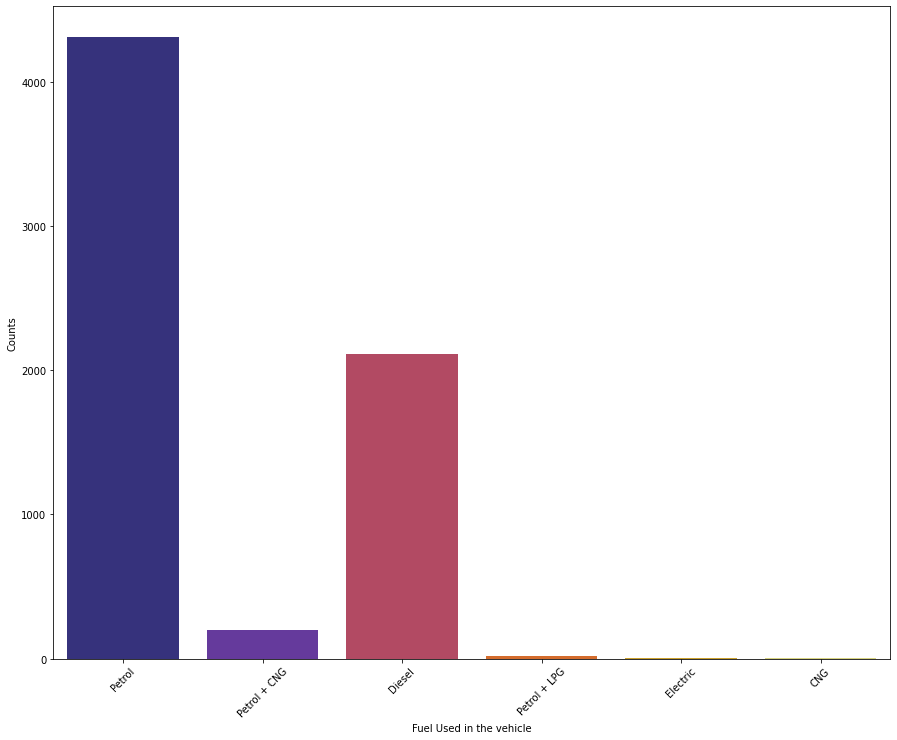

Petrol          4308
Diesel          2114
Petrol + CNG     200
Petrol + LPG      22
CNG                4
Electric           3
Name: Fuel, dtype: int64


In [31]:
plt.figure(figsize=(15,12))
sns.countplot(x='Fuel',data=df,palette='CMRmap')
plt.xlabel("Fuel Used in the vehicle")
plt.xticks(rotation='45')
plt.ylabel("Counts")
plt.show()

print(df['Fuel'].value_counts())

Most of the vehicle for sell, runs on petrol. 

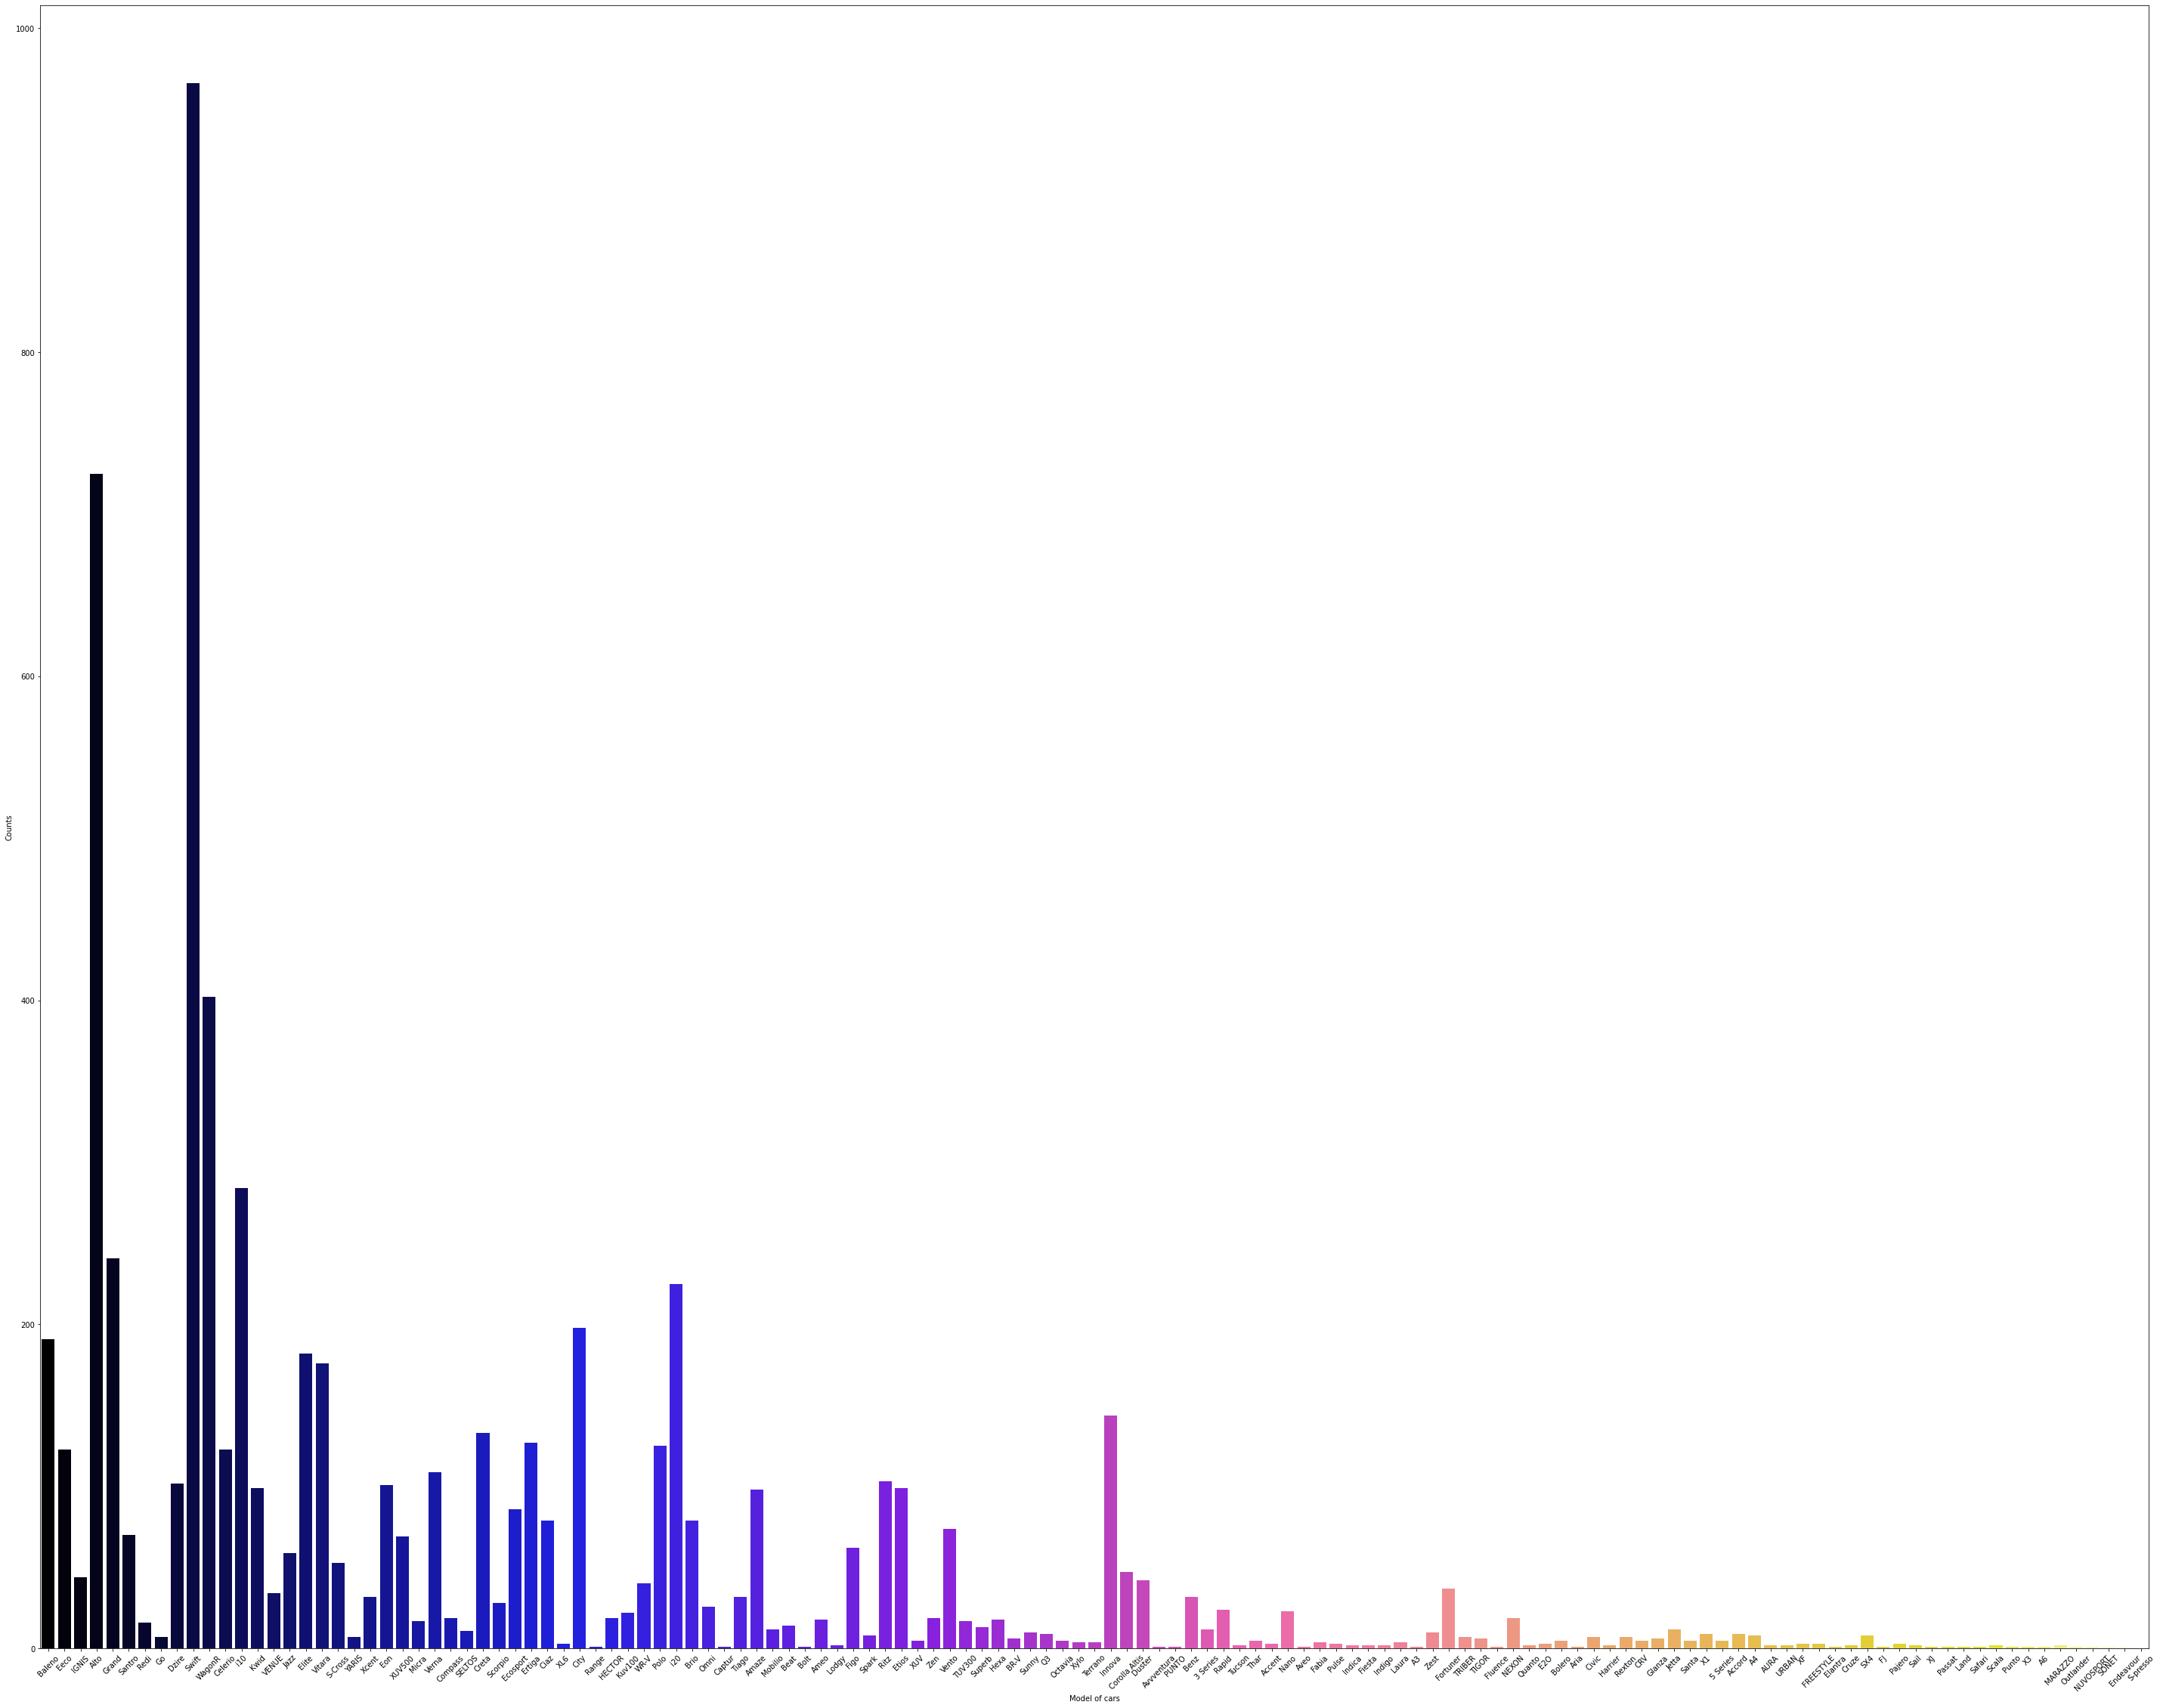

Swift            966
Alto             725
WagonR           402
i10              284
Grand            241
i20              225
City             198
Baleno           191
Elite            182
Vitara           176
Innova           144
Creta            133
Ertiga           127
Polo             125
Eeco             123
Celerio          123
Verna            109
Ritz             103
Dzire            102
Eon              101
Kwid              99
Etios             99
Amaze             98
Ecosport          86
Brio              79
Ciaz              79
Vento             74
Santro            70
XUV500            69
Figo              62
Jazz              59
S-Cross           53
Corolla Altis     47
IGNIS             44
Duster            42
WR-V              40
Fortuner          37
VENUE             34
Xcent             32
Benz              32
Tiago             32
Scorpio           28
Omni              26
Rapid             24
Nano              23
Kuv100            22
HECTOR            19
Zen          

In [32]:
plt.figure(figsize=(50,40))
sns.countplot(x='Model',data=df,palette='gnuplot2')
plt.xlabel("Model of cars")
plt.xticks(rotation='45')
plt.ylabel("Counts")
plt.show()

print(df['Model'].value_counts())

Top 3 car on sell are Swift, Alto and WanganR. All these cars belong to the Maruti brand. We can assume that Maruti cars are more on sell compare to other brands and models

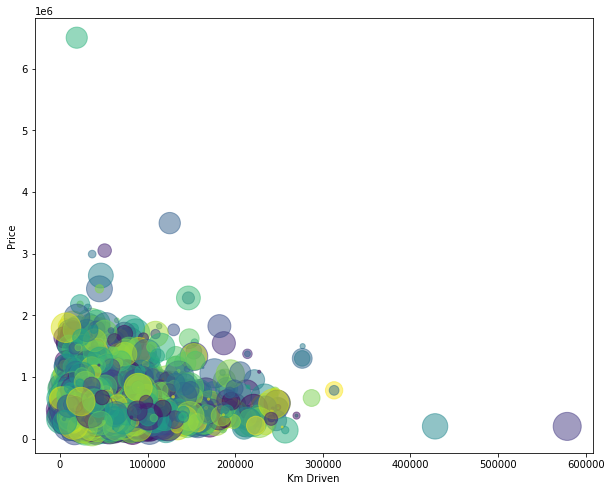

In [33]:
N=6651
plt.figure(figsize=(10,8))
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
plt.scatter(df['KM driven'], df['Price'],s=area, c=colors, alpha=0.5)
plt.xlabel(" Km Driven ")
plt.ylabel("Price")
plt.show()

Most of the vehicles on sell, were driven less than 300000km.

In [34]:
dummy=pd.get_dummies(df['Fuel'],drop_first=True)
df.drop('Fuel',axis=1,inplace=True)
df=pd.concat([df,dummy],axis=1)

In [35]:
dummy2=pd.get_dummies(df['Model'],drop_first=True)
df.drop('Model',axis=1,inplace=True)
df=pd.concat([df,dummy2],axis=1)

In [36]:
dummy3=pd.get_dummies(df['Brand'],drop_first=True)
df.drop('Brand',axis=1,inplace=True)
df=pd.concat([df,dummy3],axis=1)

Categorical values were converted into dummy variable and replaced the original one.


In [37]:

from datetime import date
today=date.today()

duration= today.year - df['Year']


Duration of the Car been registered and used are been calculated and used as a feature in the dataset

In [38]:
df.drop('Year',axis=1)


KM driven     Price  Diesel  Electric  Petrol  Petrol + CNG  \
0        3919.0  663299.0       0         0       1             0   
1        1999.0  499299.0       0         0       1             0   
2        3142.0  529899.0       0         0       1             0   
3        1322.0  379599.0       0         0       1             0   
4        3540.0  475099.0       0         0       1             0   
...         ...       ...     ...       ...     ...           ...   
6700    48193.0  668000.0       1         0       0             0   
6701    46224.0  255203.0       0         0       0             0   
6702     9779.0  530000.0       0         0       1             0   
6703    23880.0  603500.0       0         0       1             0   
6704     5673.0  266500.0       0         0       1             0   

      Petrol + LPG  5 Series  A3  A4  A6  AURA  Accent  Accord  Alto  Amaze  \
0                0         0   0   0   0     0       0       0     0      0   
1                0         0   0   0   0     0       0       0     0      0   
2                0         0   0   0   0     0       0       0     0      0   
3                0         0   0   0   0     0       0       0     1      0   
4                0         0   0   0   0     0       0       0     0      0   
...            ...       ...  ..  ..  ..   ...     ...     ...   ...    ...   
6700             0         0   0   0   0     0       0       0     0      0   
6701             0         0   0   0   0     0       0       0     0      0   
6702             0         0   0   0   0     0       0       0     0      0   
6703             0         0   0   0   0     0       0       0     0      0   
6704             0         0   0   0   0     0       0       0     1      0   

      Ameo  Aria  Aveo  Avvventura  BR-V  Baleno  Beat  Benz  Bolero  Bolt  \
0        0     0     0           0     0       1     0     0       0     0   
1        0     0     0           0     0       0     0     0       0     0   
2        0     0     0           0     0       0     0     0       0     0   
3        0     0     0           0     0       0     0     0       0     0   
4        0     0     0           0     0       0     0     0       0     0   
...    ...   ...   ...         ...   ...     ...   ...   ...     ...   ...   
6700     0     0     0           0     0       0     0     0       0     0   
6701     0     0     0           0     0       0     0     0       0     0   
6702     0     0     0           0     0       0     0     0       0     0   
6703     0     0     0           0     0       0     0     0       0     0   
6704     0     0     0           0     0       0     0     0       0     0   

      Brio  CRV  Captur  Celerio  Ciaz  City  Civic  Compass  Corolla Altis  \
0        0    0       0        0     0     0      0        0              0   
1        0    0       0        0     0     0      0        0              0   
2        0    0       0        0     0     0      0        0              0   
3        0    0       0        0     0     0      0        0              0   
4        0    0       0        0     0     0      0        0              0   
...    ...  ...     ...      ...   ...   ...    ...      ...            ...   
6700     0    0       0        0     0     0      0        0              0   
6701     0    0       0        0     0     0      0        0              0   
6702     0    0       0        0     0     0      0        0              0   
6703     0    0       0        0     0     0      0        0              0   
6704     0    0       0        0     0     0      0        0              0   

      Creta  Cruze  Duster  Dzire  E2O  Ecosport  Eeco  Elantra  Elite  \
0         0      0       0      0    0         0     0        0      0   
1         0      0       0      0    0         0     1        0      0   
2         0      0       0      0    0         0     0        0      0   
3         0      0       0      0    0        

"Year" feature was dropped from the dataset. as we have created the duration of the car used with respect to current year. 

In [39]:
df1=df.copy()

In [40]:

Duration=pd.DataFrame({"Duration":duration})
Duration

Duration
0            1
1            1
2            1
3            1
4            2
...        ...
6700         3
6701         9
6702         2
6703         4
6704         0

[6651 rows x 1 columns]

In [41]:
df1=pd.concat([df1,Duration],axis=1)

In [42]:
df1.head()

Year  KM driven     Price  Diesel  Electric  Petrol  Petrol + CNG  \
0  2020     3919.0  663299.0       0         0       1             0   
1  2020     1999.0  499299.0       0         0       1             0   
2  2020     3142.0  529899.0       0         0       1             0   
3  2020     1322.0  379599.0       0         0       1             0   
4  2019     3540.0  475099.0       0         0       1             0   

   Petrol + LPG  5 Series  A3  A4  A6  AURA  Accent  Accord  Alto  Amaze  \
0             0         0   0   0   0     0       0       0     0      0   
1             0         0   0   0   0     0       0       0     0      0   
2             0         0   0   0   0     0       0       0     0      0   
3             0         0   0   0   0     0       0       0     1      0   
4             0         0   0   0   0     0       0       0     0      0   

   Ameo  Aria  Aveo  Avvventura  BR-V  Baleno  Beat  Benz  Bolero  Bolt  Brio  \
0     0     0     0           0     0       1     0     0       0     0     0   
1     0     0     0           0     0       0     0     0       0     0     0   
2     0     0     0           0     0       0     0     0       0     0     0   
3     0     0     0           0     0       0     0     0       0     0     0   
4     0     0     0           0     0       0     0     0       0     0     0   

   CRV  Captur  Celerio  Ciaz  City  Civic  Compass  Corolla Altis  Creta  \
0    0       0        0     0     0      0        0              0      0   
1    0       0        0     0     0      0        0              0      0   
2    0       0        0     0     0      0        0              0      0   
3    0       0        0     0     0      0        0              0      0   
4    0       0        0     0     0      0        0              0      0   

   Cruze  Duster  Dzire  E2O  Ecosport  Eeco  Elantra  Elite  Endeavour  Eon  \
0      0       0      0    0         0     0        0      0          0    0   
1      0       0      0    0         0     1        0      0          0    0   
2      0       0      0    0         0     0        0      0          0    0   
3      0       0      0    0         0     0        0      0          0    0   
4      0       0      0    0         0     1        0      0          0    0   

   Ertiga  Etios  FJ  FREESTYLE  Fabia  Fiesta  Figo  Fluence  Fortuner  \
0       0      0   0          0      0       0     0        0         0   
1       0      0   0          0      0       0     0        0         0   
2       0      0   0          0      0       0     0        0         0   
3       0      0   0          0      0       0     0        0         0   
4       0      0   0          0      0       0     0        0         0   

   Glanza  Go  Grand  HECTOR  Harrier  Hexa  IGNIS  Indica  Indigo  Innova  \
0       0   0      0       0        0     0      0       0       0       0   
1       0   0      0       0        0     0      0       0       0       0   
2       0   0      0       0        0     0      1       0       0       0   
3       0   0      0       0        0     0      0       0       0       0   
4       0   0      0       0        0     0      0       0       0       0   

   Jazz  Jetta  Kuv100  Kwid  Land  Laura  Lodgy  MARAZZO  Micra  Mobilio  \
0     0      0       0     0     0      0      0        0      0        0   
1     0      0       0     0     0      0      0        0      0        0   
2     0      0       0     0     0      0      0        0      0        0   
3     0      0       0     0     0      0      0        0      0        0   
4     0      0       0     0     0      0      0        0      0        0   

   NEXON  NUVOSPORT  Nano  Octavia  Omni  Outlander  PUNTO  Pajero  Passat  \
0      0          0     0        0     0          0      0       0       0   
1      0          0     0        0     0          0      0       0       0   
2      0          0     0        0     0          0      0       

In [43]:
df1.drop('Year',axis=1,inplace=True)

In [44]:
df1.head()

KM driven     Price  Diesel  Electric  Petrol  Petrol + CNG  Petrol + LPG  \
0     3919.0  663299.0       0         0       1             0             0   
1     1999.0  499299.0       0         0       1             0             0   
2     3142.0  529899.0       0         0       1             0             0   
3     1322.0  379599.0       0         0       1             0             0   
4     3540.0  475099.0       0         0       1             0             0   

   5 Series  A3  A4  A6  AURA  Accent  Accord  Alto  Amaze  Ameo  Aria  Aveo  \
0         0   0   0   0     0       0       0     0      0     0     0     0   
1         0   0   0   0     0       0       0     0      0     0     0     0   
2         0   0   0   0     0       0       0     0      0     0     0     0   
3         0   0   0   0     0       0       0     1      0     0     0     0   
4         0   0   0   0     0       0       0     0      0     0     0     0   

   Avvventura  BR-V  Baleno  Beat  Benz  Bolero  Bolt  Brio  CRV  Captur  \
0           0     0       1     0     0       0     0     0    0       0   
1           0     0       0     0     0       0     0     0    0       0   
2           0     0       0     0     0       0     0     0    0       0   
3           0     0       0     0     0       0     0     0    0       0   
4           0     0       0     0     0       0     0     0    0       0   

   Celerio  Ciaz  City  Civic  Compass  Corolla Altis  Creta  Cruze  Duster  \
0        0     0     0      0        0              0      0      0       0   
1        0     0     0      0        0              0      0      0       0   
2        0     0     0      0        0              0      0      0       0   
3        0     0     0      0        0              0      0      0       0   
4        0     0     0      0        0              0      0      0       0   

   Dzire  E2O  Ecosport  Eeco  Elantra  Elite  Endeavour  Eon  Ertiga  Etios  \
0      0    0         0     0        0      0          0    0       0      0   
1      0    0         0     1        0      0          0    0       0      0   
2      0    0         0     0        0      0          0    0       0      0   
3      0    0         0     0        0      0          0    0       0      0   
4      0    0         0     1        0      0          0    0       0      0   

   FJ  FREESTYLE  Fabia  Fiesta  Figo  Fluence  Fortuner  Glanza  Go  Grand  \
0   0          0      0       0     0        0         0       0   0      0   
1   0          0      0       0     0        0         0       0   0      0   
2   0          0      0       0     0        0         0       0   0      0   
3   0          0      0       0     0        0         0       0   0      0   
4   0          0      0       0     0        0         0       0   0      0   

   HECTOR  Harrier  Hexa  IGNIS  Indica  Indigo  Innova  Jazz  Jetta  Kuv100  \
0       0        0     0      0       0       0       0     0      0       0   
1       0        0     0      0       0       0       0     0      0       0   
2       0        0     0      1       0       0       0     0      0       0   
3       0        0     0      0       0       0       0     0      0       0   
4       0        0     0      0       0       0       0     0      0       0   

   Kwid  Land  Laura  Lodgy  MARAZZO  Micra  Mobilio  NEXON  NUVOSPORT  Nano  \
0     0     0      0      0        0      0        0      0          0     0   
1     0     0      0      0        0      0        0      0          0     0   
2     0     0      0      0        0      0        0      0          0     0   
3     0     0      0      0        0      0        0      0          0     0   
4     0     0      0      0        0      0        0      0          0     0   

   Octavia  Omni  Outlander  PUNTO  Pajero  Passat  Polo  Pulse  Punto  Q3  \
0        0     0          0      0       0       0     0      0      0   0   
1        0     0          0      0 

In [45]:
df2=df1.copy()

In [46]:
df2.skew()

KM driven         1.603608
Price             3.409684
Diesel            0.782554
Electric         47.063781
Petrol           -0.618638
Petrol + CNG      5.504514
Petrol + LPG     17.304813
5 Series         36.438985
A3               81.553663
A4               28.788018
A6               81.553663
AURA             57.654137
Accent           47.063781
Accord           27.135465
Alto              2.509776
Amaze             8.056772
Ameo             19.148579
Aria             81.553663
Aveo             81.553663
Avvventura       81.553663
BR-V             33.256575
Baleno            5.644991
Beat             21.732155
Benz             14.315761
Bolero           36.438985
Bolt             81.553663
Brio              9.013242
CRV              36.438985
Captur           81.553663
Celerio           7.149480
Ciaz              9.013242
City              5.534926
Civic            30.782646
Compass          18.633628
Corolla Altis    11.772012
Creta             6.859238
Cruze            57.654137
D

Most of the features were skewed and need to be treated.

In [47]:
skewness=pd.DataFrame(df2.skew(),columns=['skew'])
skewness['Absolute_values']=skewness['skew'].abs()
skewness['Actual_skew']=skewness['Absolute_values'].apply(lambda x:True if x>=0.5 else False)
skewness

skew  Absolute_values  Actual_skew
KM driven       1.603608         1.603608         True
Price           3.409684         3.409684         True
Diesel          0.782554         0.782554         True
Electric       47.063781        47.063781         True
Petrol         -0.618638         0.618638         True
Petrol + CNG    5.504514         5.504514         True
Petrol + LPG   17.304813        17.304813         True
5 Series       36.438985        36.438985         True
A3             81.553663        81.553663         True
A4             28.788018        28.788018         True
A6             81.553663        81.553663         True
AURA           57.654137        57.654137         True
Accent         47.063781        47.063781         True
Accord         27.135465        27.135465         True
Alto            2.509776         2.509776         True
Amaze           8.056772         8.056772         True
Ameo           19.148579        19.148579         True
Aria           81.553663        81.553663         True
Aveo           81.553663        81.553663         True
Avvventura     81.553663        81.553663         True
BR-V           33.256575        33.256575         True
Baleno          5.644991         5.644991         True
Beat           21.732155        21.732155         True
Benz           14.315761        14.315761         True
Bolero         36.438985        36.438985         True
Bolt           81.553663        81.553663         True
Brio            9.013242         9.013242         True
CRV            36.438985        36.438985         True
Captur         81.553663        81.553663         True
Celerio         7.149480         7.149480         True
Ciaz            9.013242         9.013242         True
City            5.534926         5.534926         True
Civic          30.782646        30.782646         True
Compass        18.633628        18.633628         True
Corolla Altis  11.772012        11.772012         True
Creta           6.859238         6.859238         True
Cruze          57.654137        57.654137         True
Duster         12.467301        12.467301         True
Dzire           7.889837         7.889837         True
E2O            47.063781        47.063781         True
Ecosport        8.624608         8.624608         True
Eeco            7.149480         7.149480         True
Elantra        81.553663        81.553663         True
Elite           5.795450         5.795450         True
Endeavour      81.553663        81.553663         True
Eon             7.930654         7.930654         True
Ertiga          7.029355         7.029355         True
Etios           8.014106         8.014106         True
FJ             81.553663        81.553663         True
FREESTYLE      47.063781        47.063781         True
Fabia          40.749228        40.749228         True
Fiesta         57.654137        57.654137         True
Figo           10.214238        10.214238         True
Fluence        81.553663        81.553663         True
Fortuner       13.298200        13.298200         True
Glanza         33.256575        33.256575         True
Go             30.782646        30.782646         True
Grand           4.964496         4.964496         True
HECTOR         18.633628        18.633628         True
Harrier        57.654137        57.654137         True
Hexa           19.148579        19.148579         True
IGNIS          12.175081        12.175081         True
Indica         57.654137        57.654137         True
Indigo         57.654137        57.654137         True
Innova          6.574886         6.574886         True
Jazz           10.477943        10.477943         True
Jetta          23.484049        23.484049         True
Kuv100         17.304813        17.304813         True
Kwid            8.014106         8.014106         True
Land           81.553663        81.553663         True
Laura          40.749228        40.749228         True
Lodgy          57.654137        57.654137         True
MARAZ

A data frame of skewed data were created along with the absolute value.

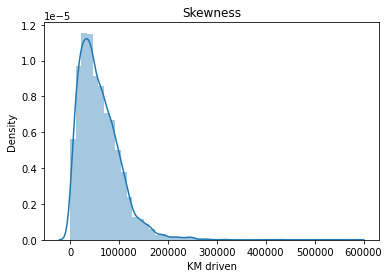

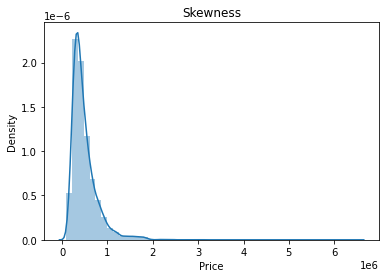

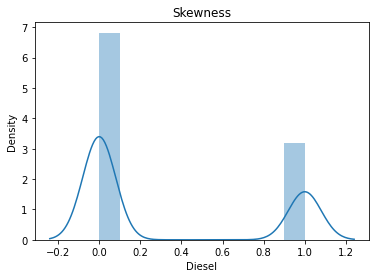

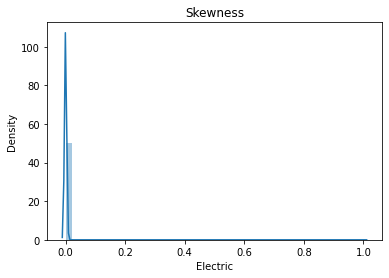

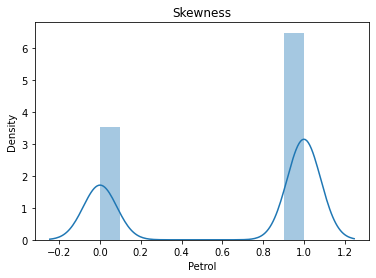

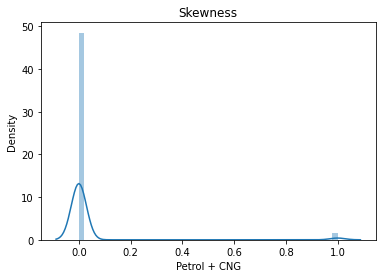

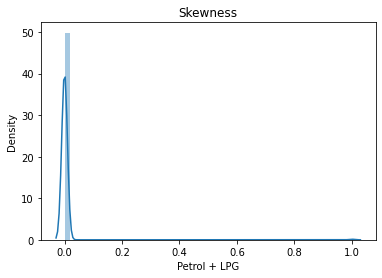

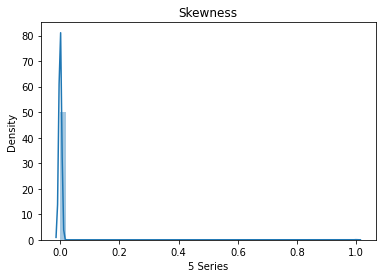

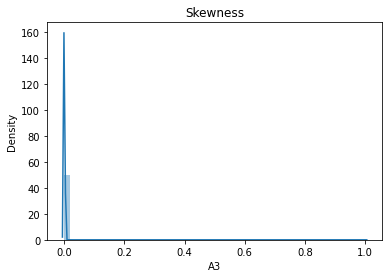

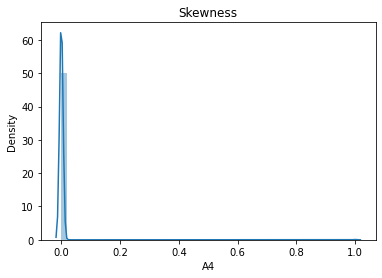

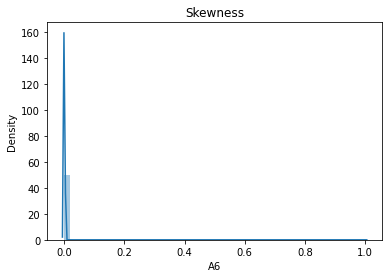

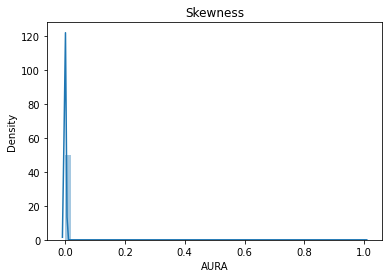

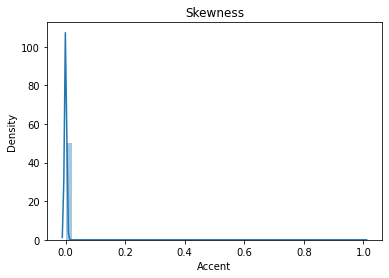

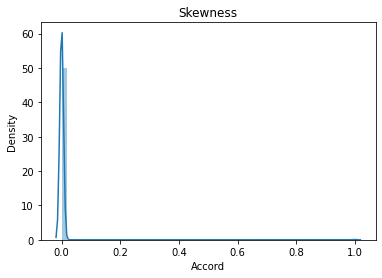

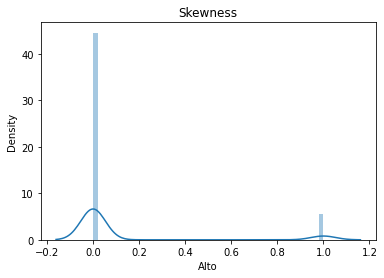

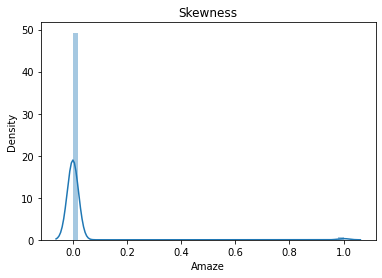

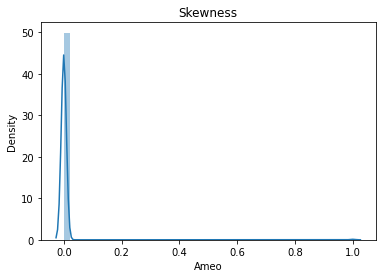

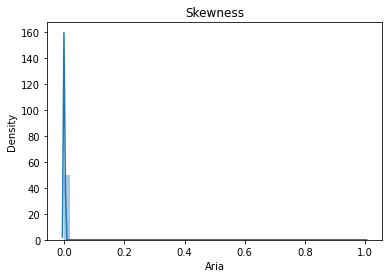

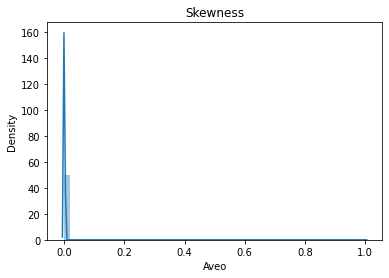

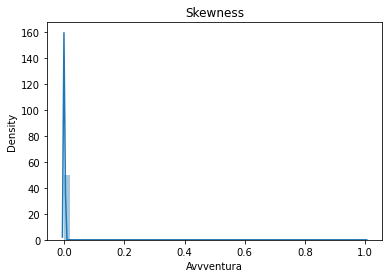

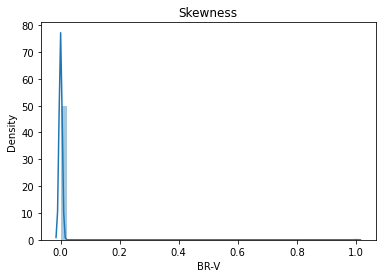

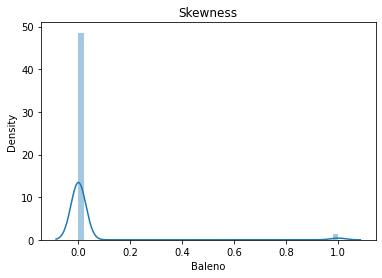

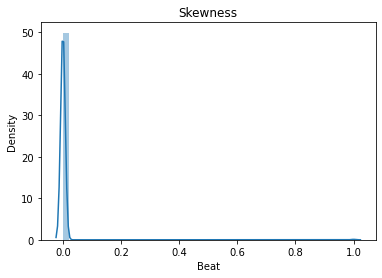

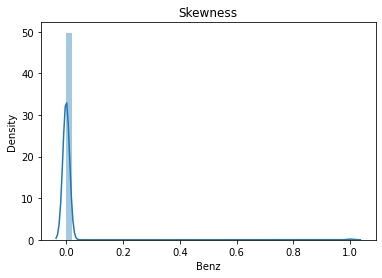

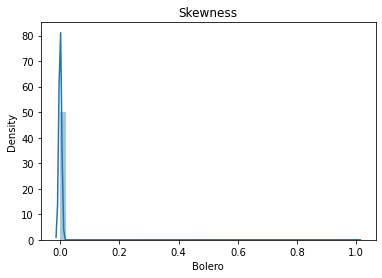

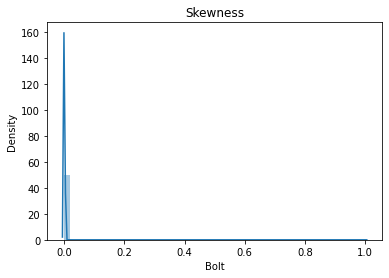

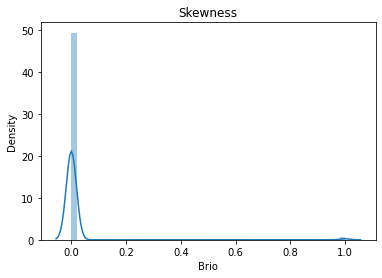

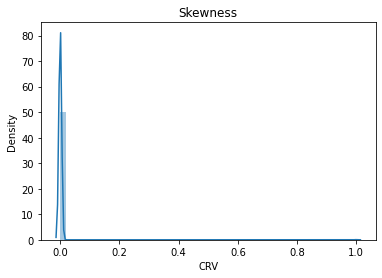

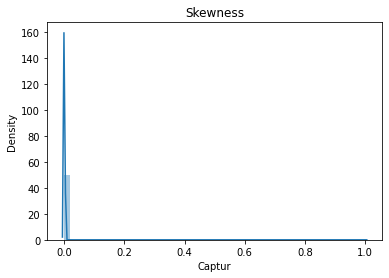

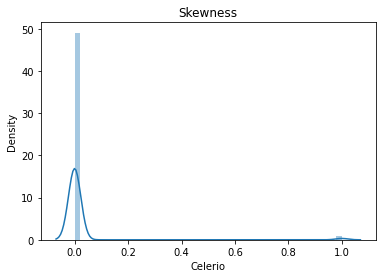

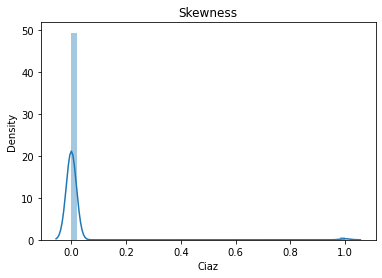

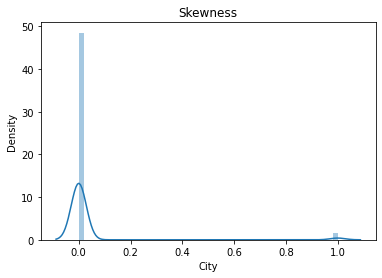

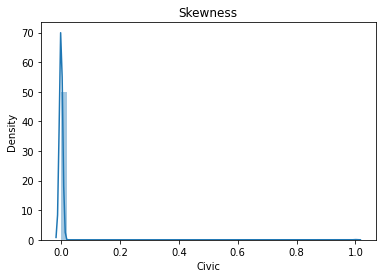

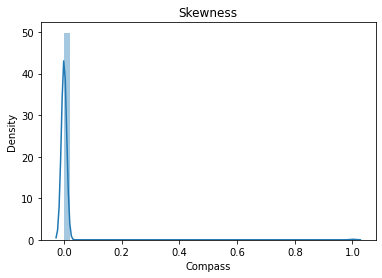

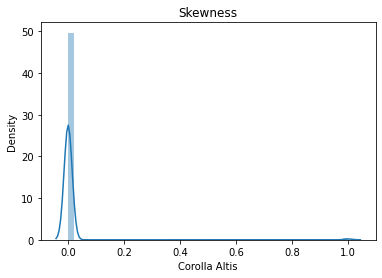

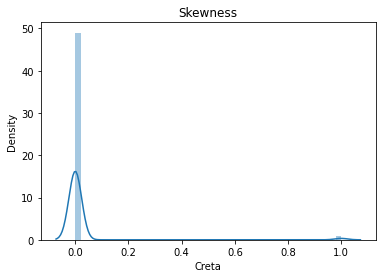

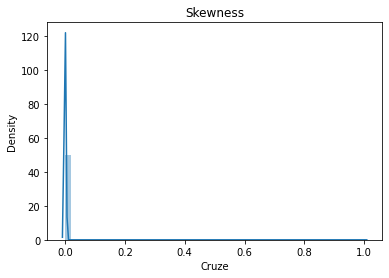

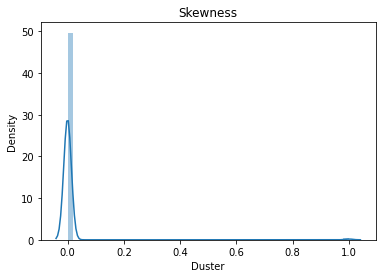

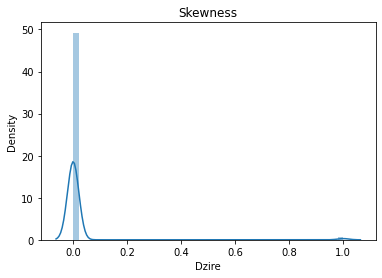

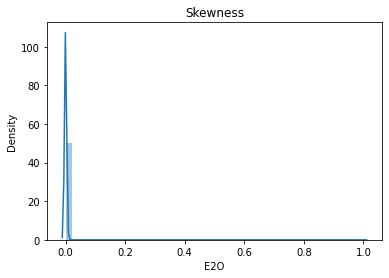

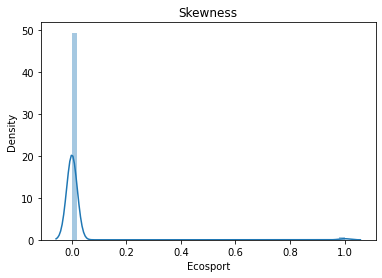

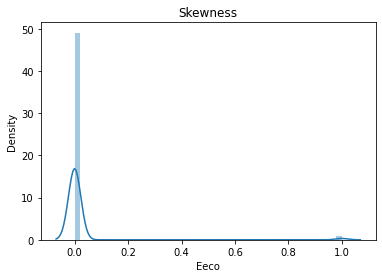

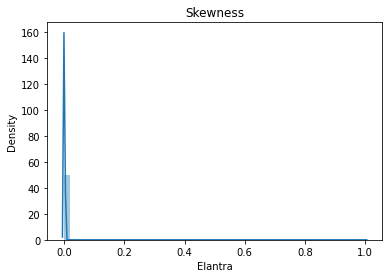

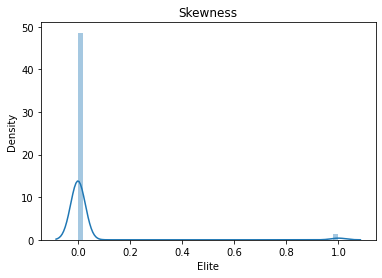

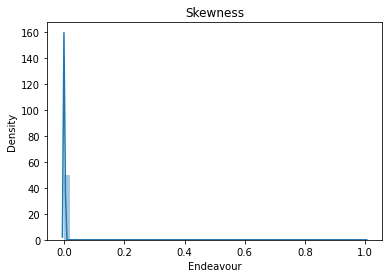

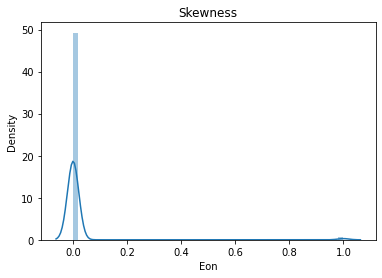

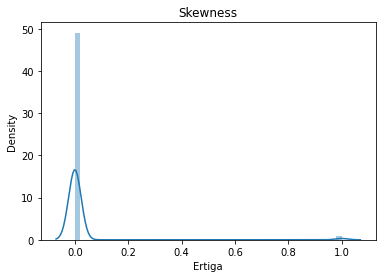

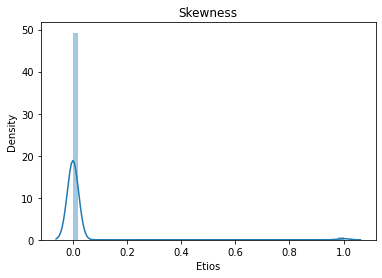

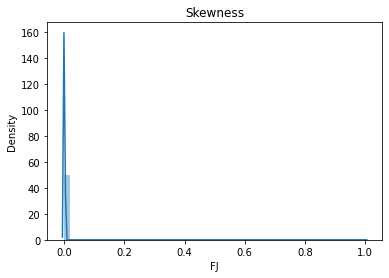

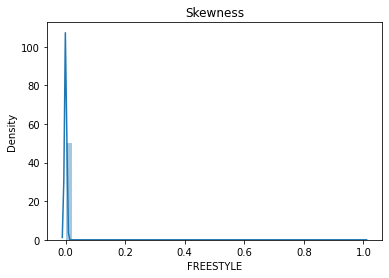

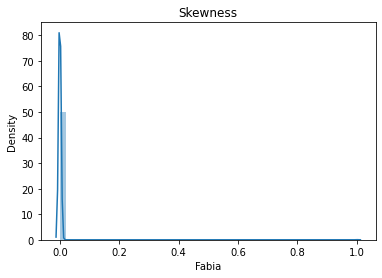

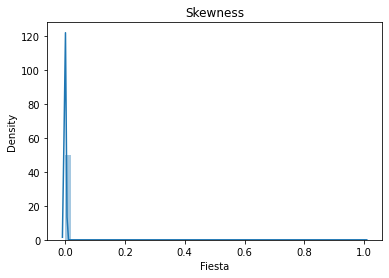

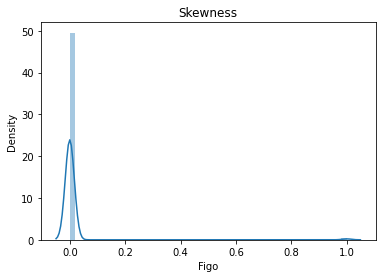

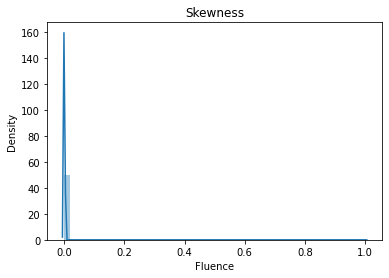

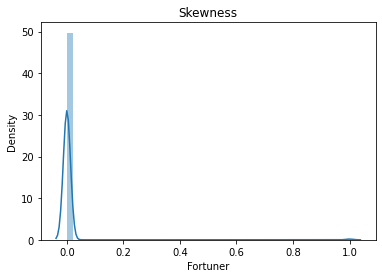

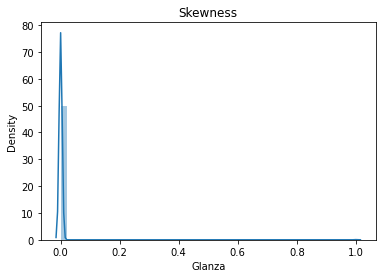

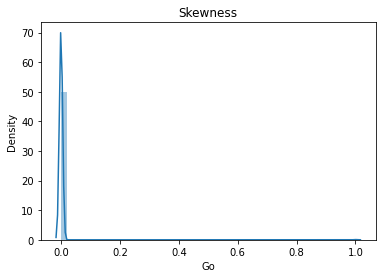

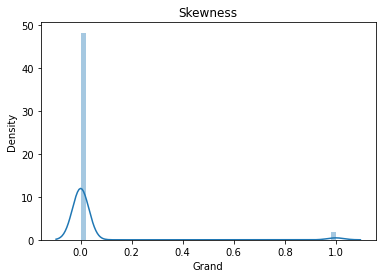

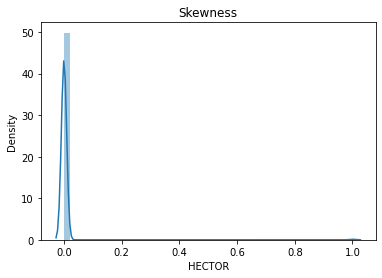

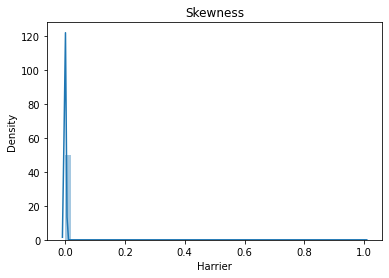

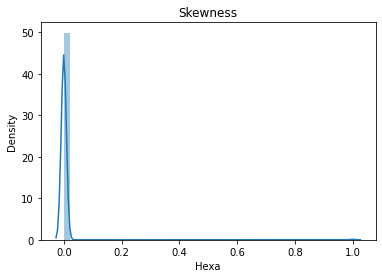

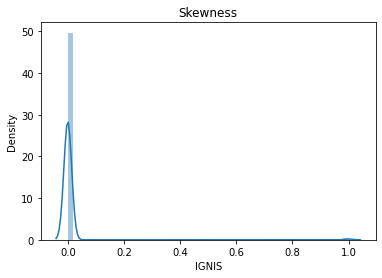

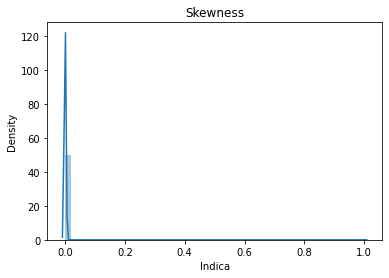

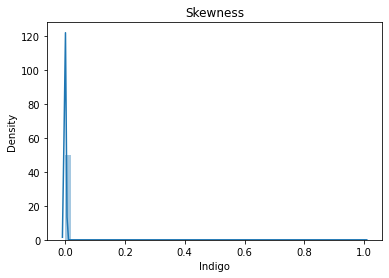

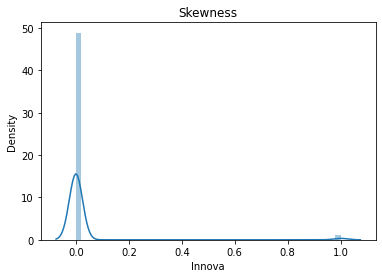

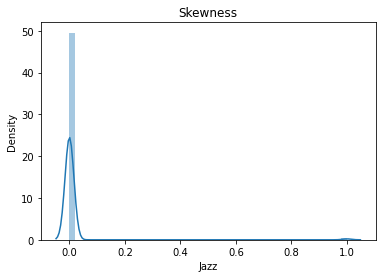

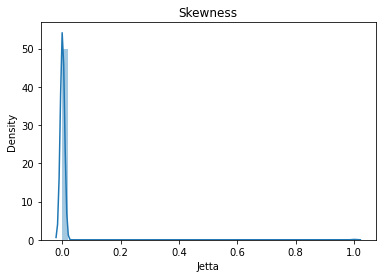

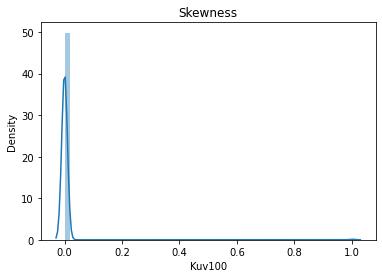

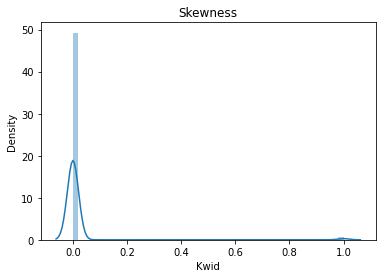

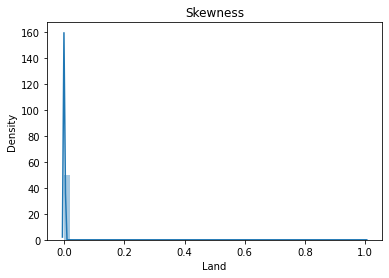

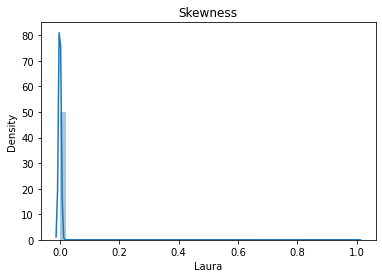

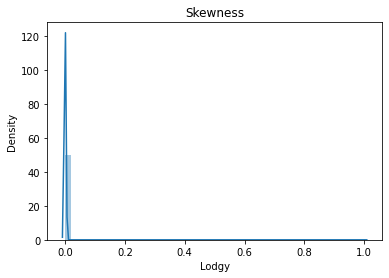

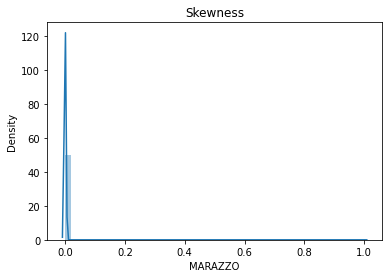

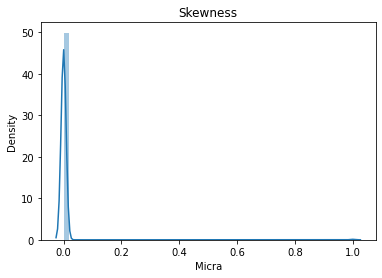

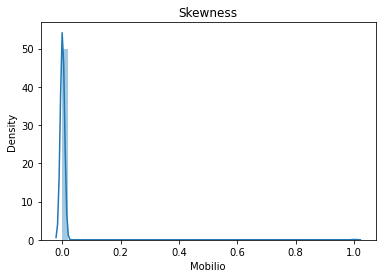

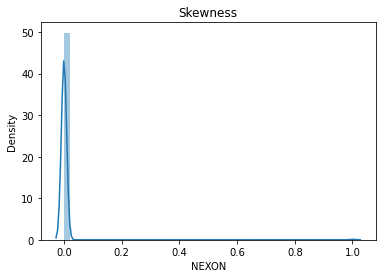

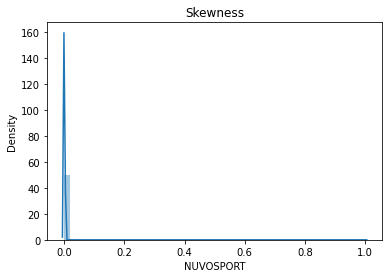

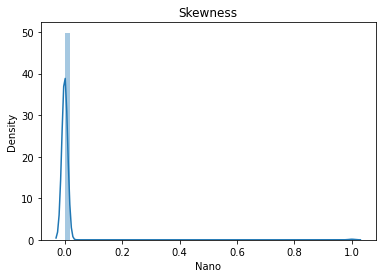

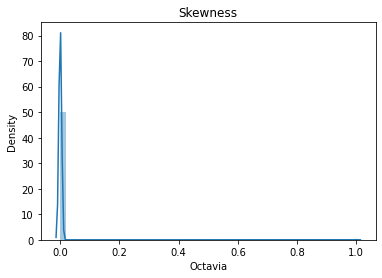

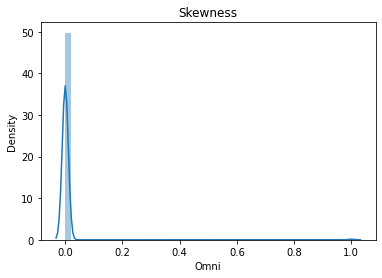

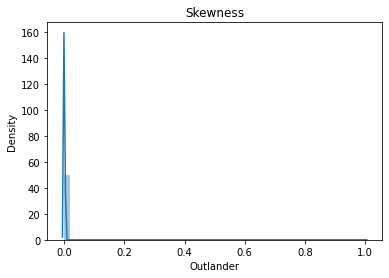

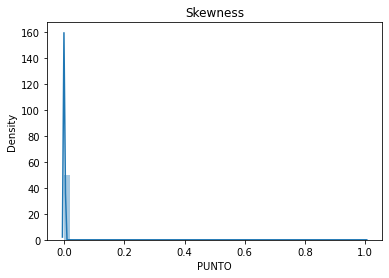

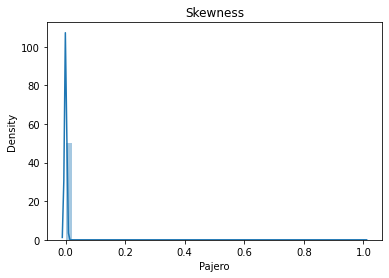

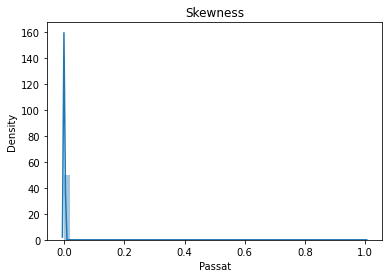

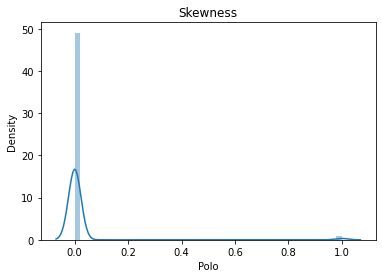

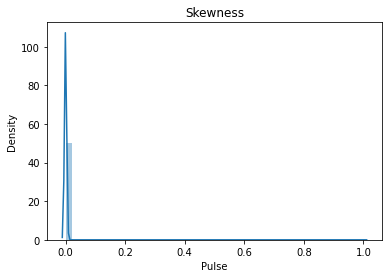

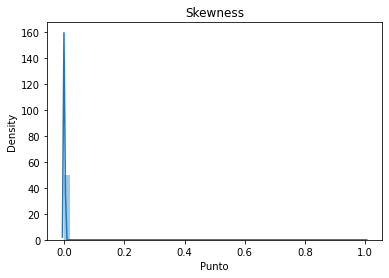

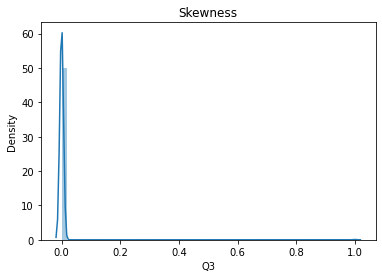

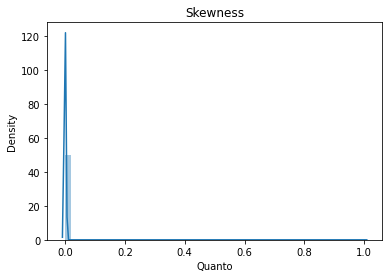

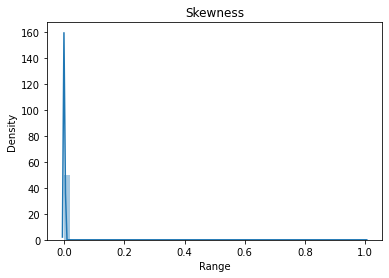

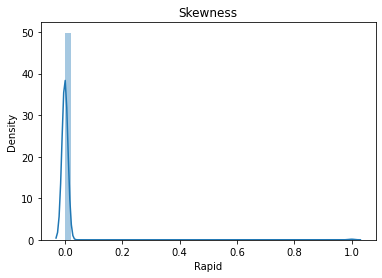

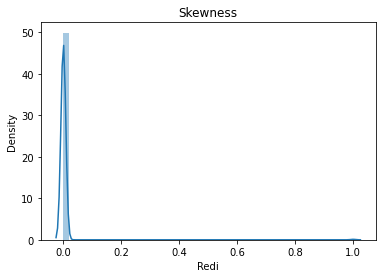

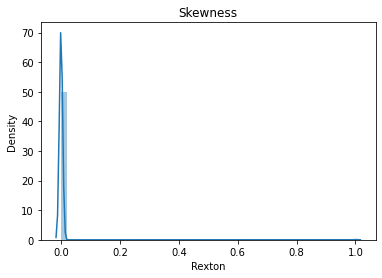

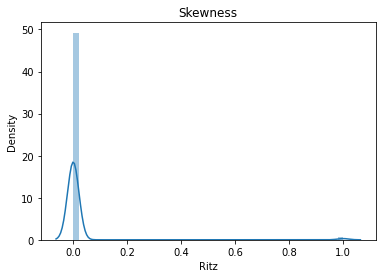

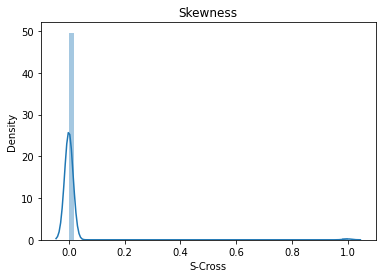

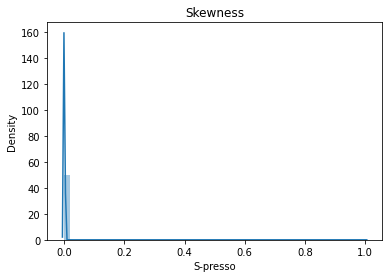

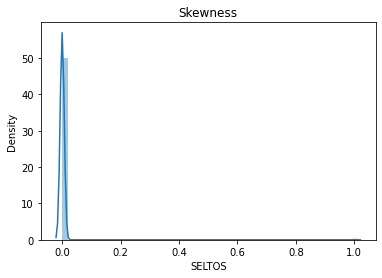

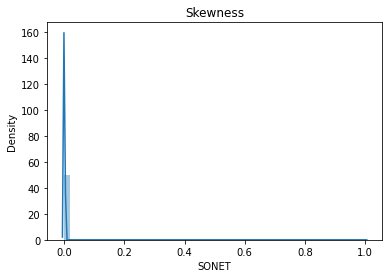

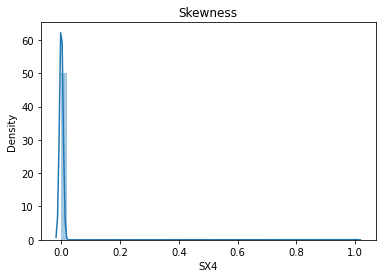

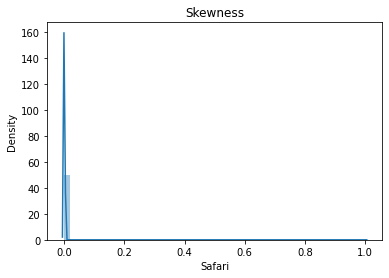

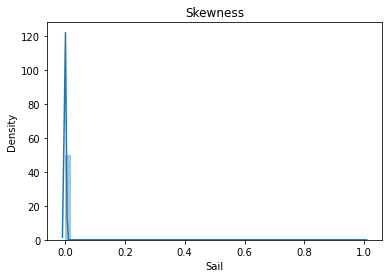

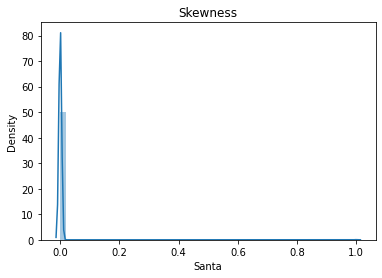

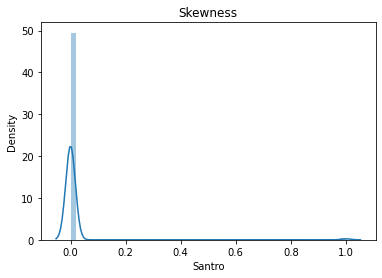

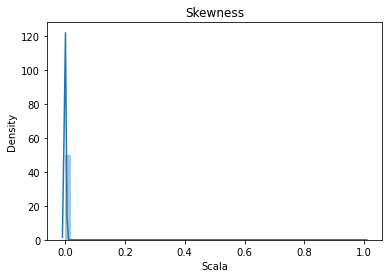

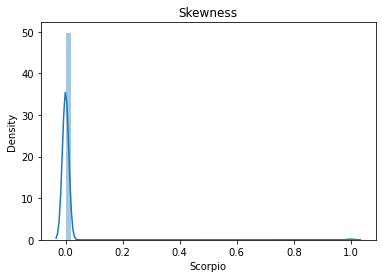

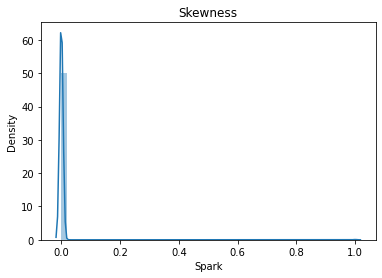

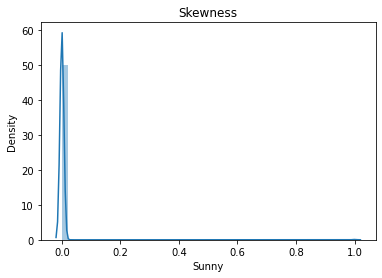

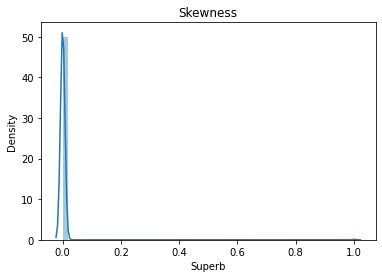

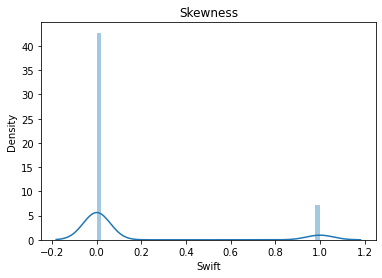

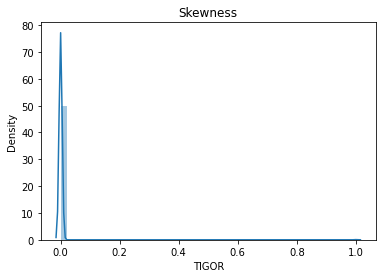

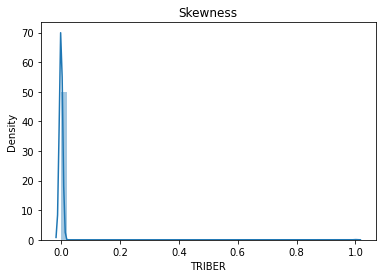

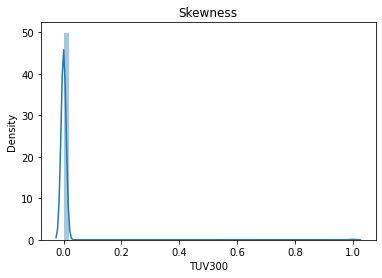

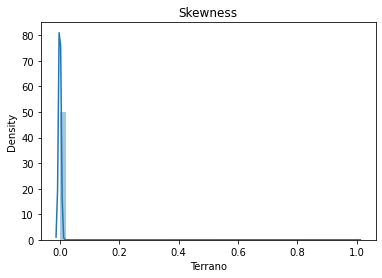

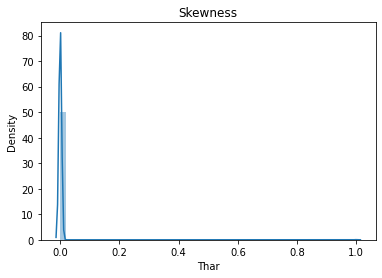

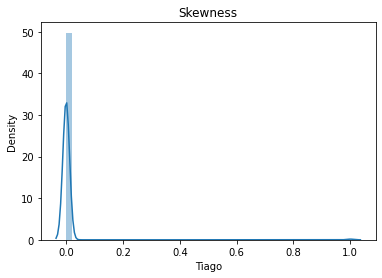

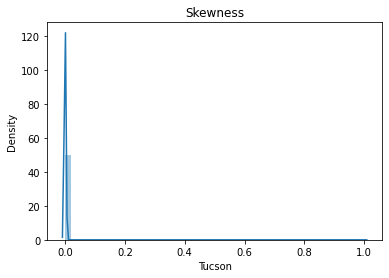

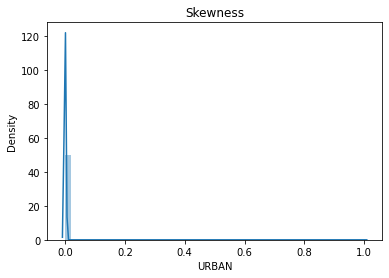

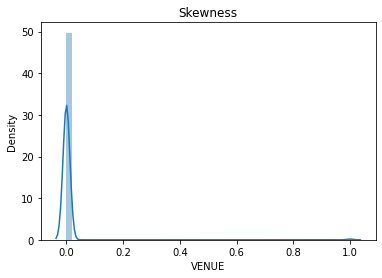

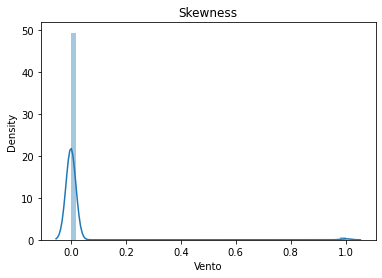

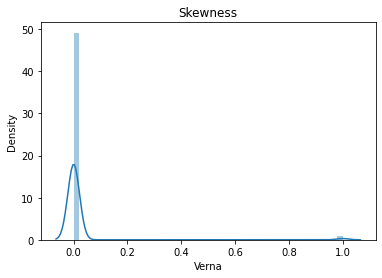

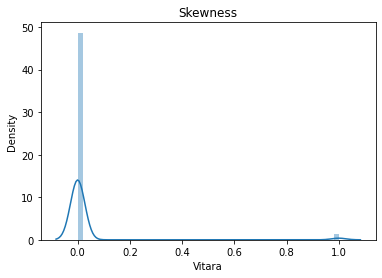

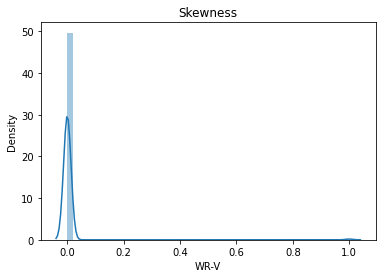

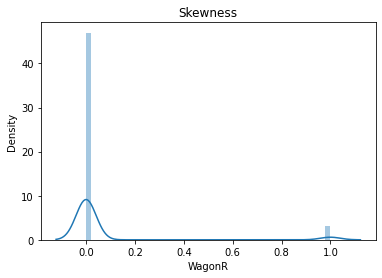

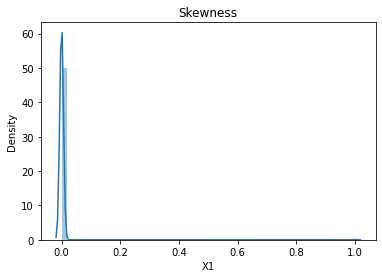

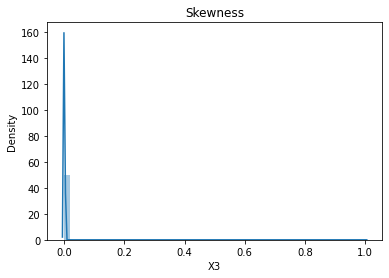

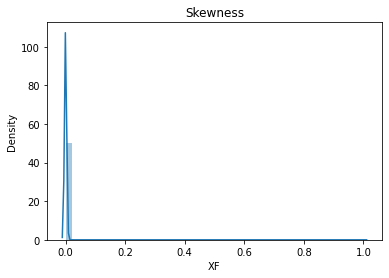

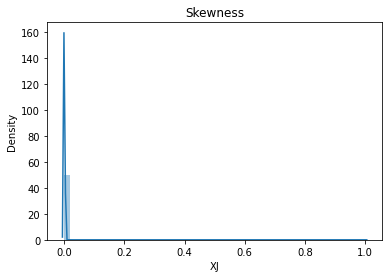

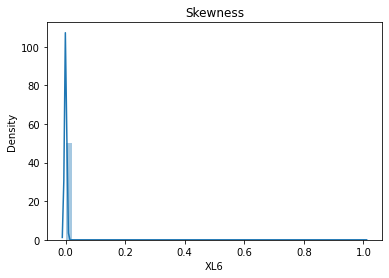

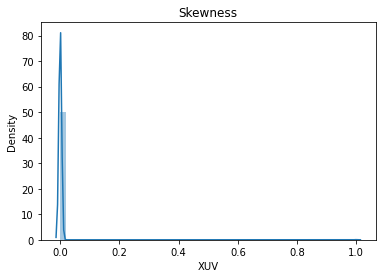

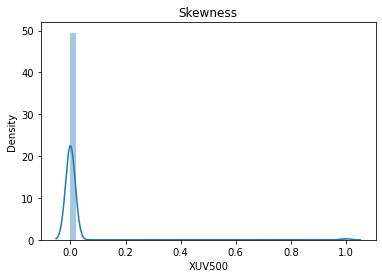

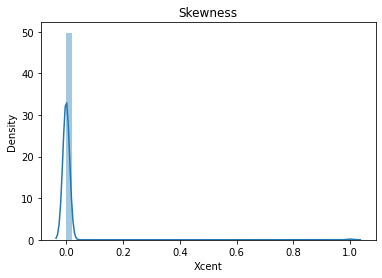

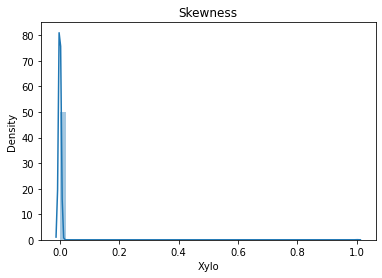

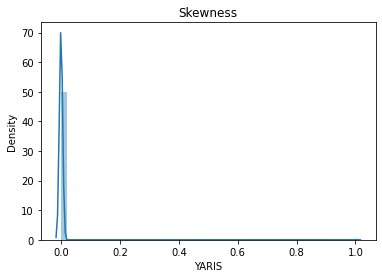

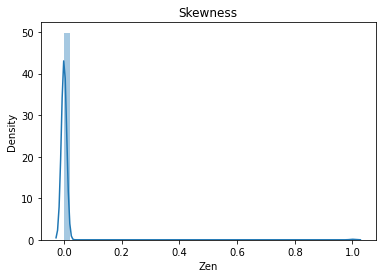

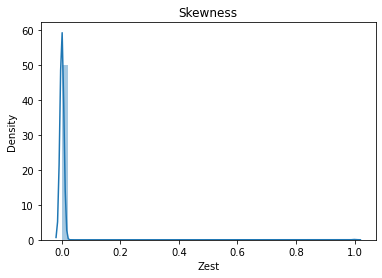

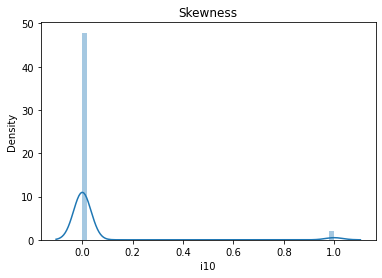

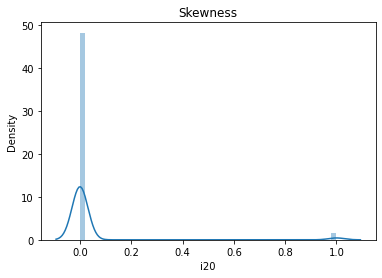

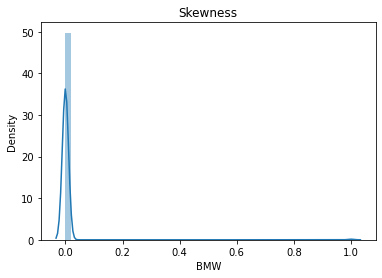

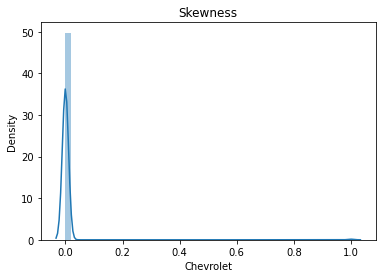

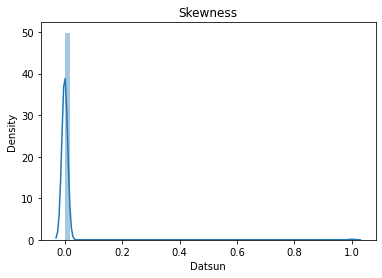

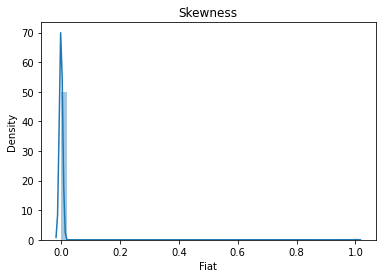

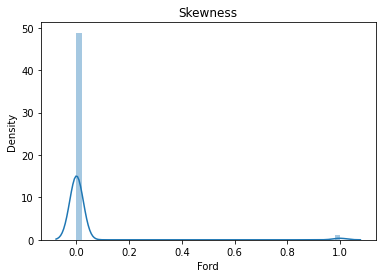

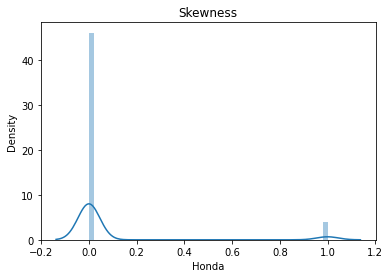

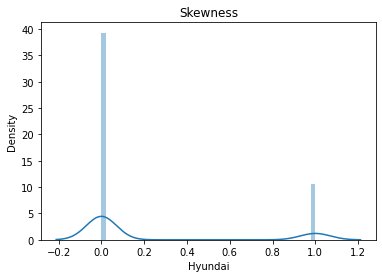

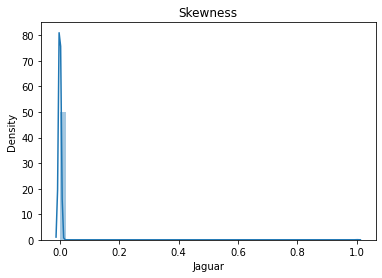

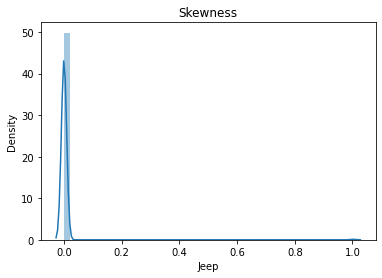

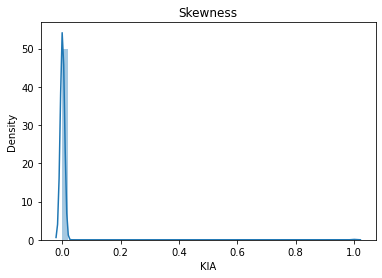

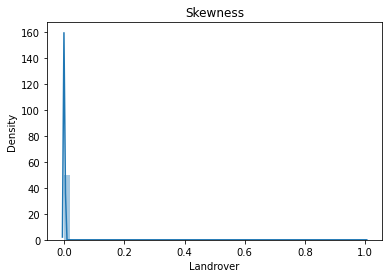

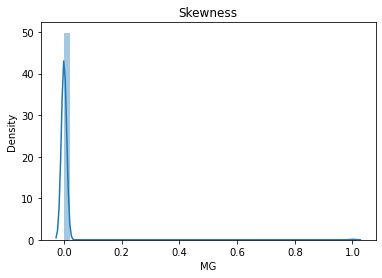

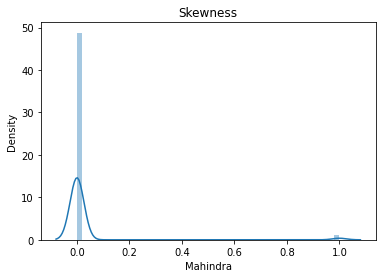

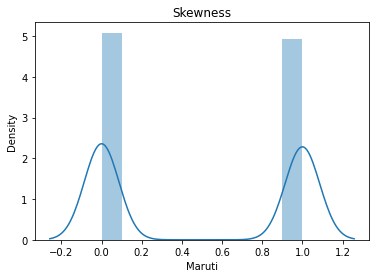

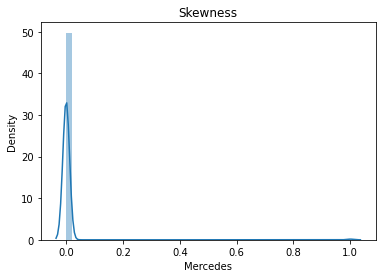

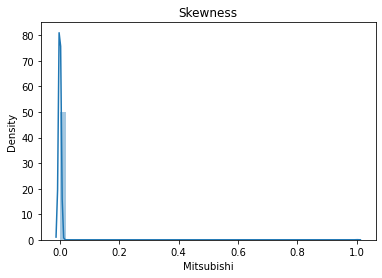

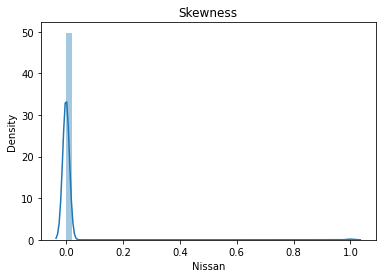

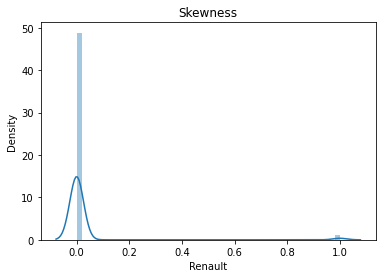

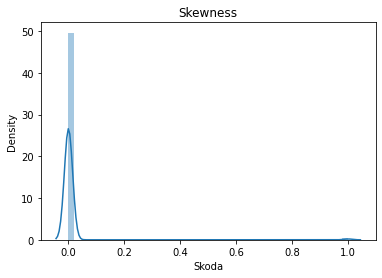

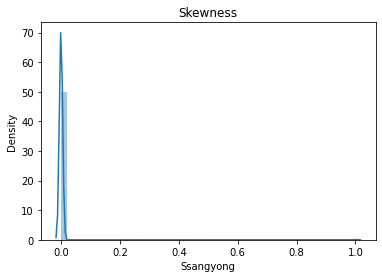

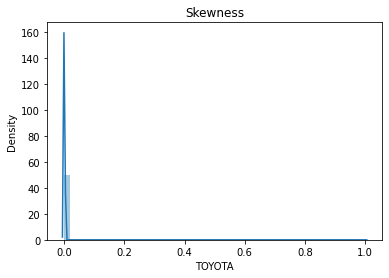

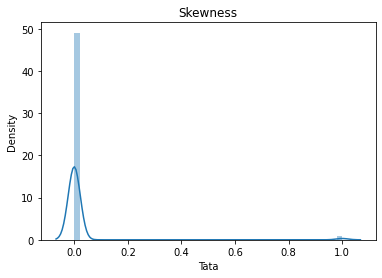

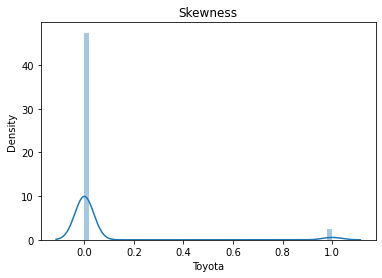

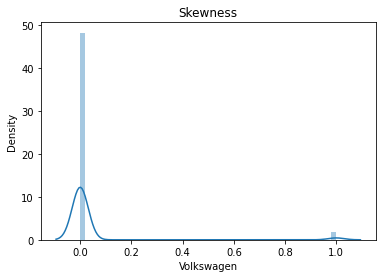

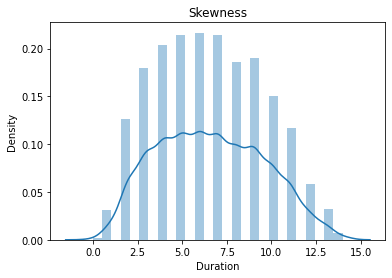

In [48]:
for column in df2.columns:
    sns.distplot(df2[column])
    plt.xlabel(column)
    plt.title("Skewness")
    plt.show()

Detecting the skewness in the features in the dataset

In [49]:
skewness.query('Actual_skew ==True')['skew']

KM driven         1.603608
Price             3.409684
Diesel            0.782554
Electric         47.063781
Petrol           -0.618638
Petrol + CNG      5.504514
Petrol + LPG     17.304813
5 Series         36.438985
A3               81.553663
A4               28.788018
A6               81.553663
AURA             57.654137
Accent           47.063781
Accord           27.135465
Alto              2.509776
Amaze             8.056772
Ameo             19.148579
Aria             81.553663
Aveo             81.553663
Avvventura       81.553663
BR-V             33.256575
Baleno            5.644991
Beat             21.732155
Benz             14.315761
Bolero           36.438985
Bolt             81.553663
Brio              9.013242
CRV              36.438985
Captur           81.553663
Celerio           7.149480
Ciaz              9.013242
City              5.534926
Civic            30.782646
Compass          18.633628
Corolla Altis    11.772012
Creta             6.859238
Cruze            57.654137
D

In [50]:
# Log transformation was done to treat the skewness in the dataset.
for columns in df2.columns:
    df2[columns]=np.log1p(df2[columns])

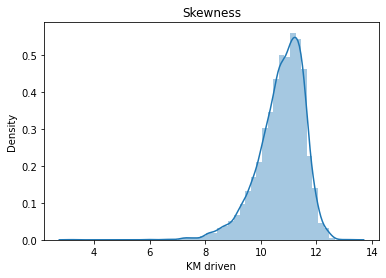

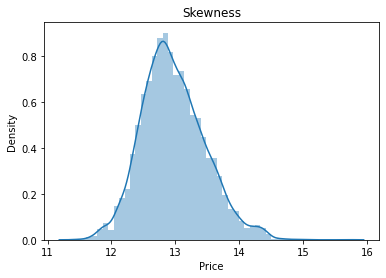

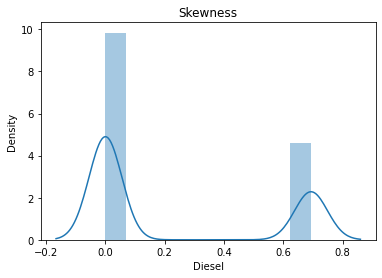

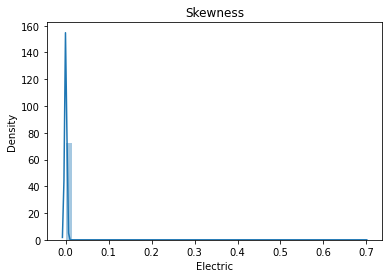

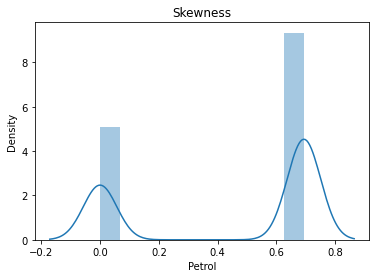

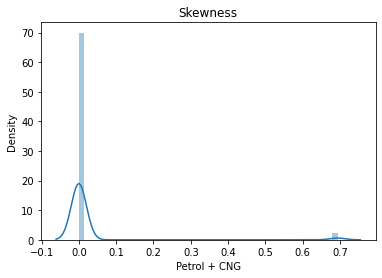

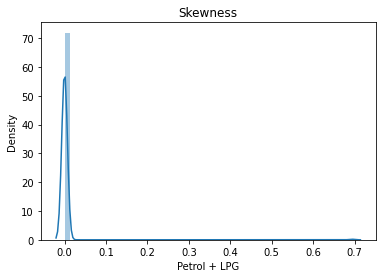

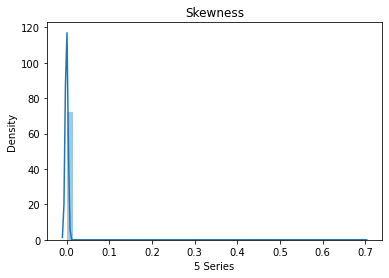

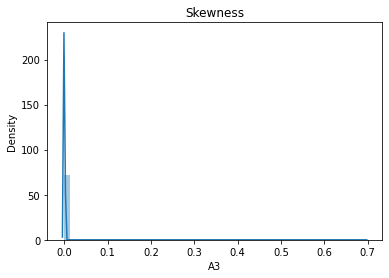

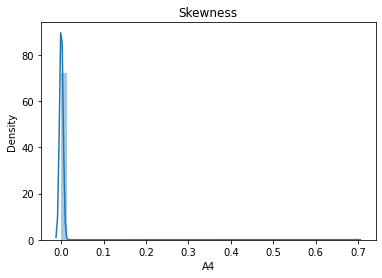

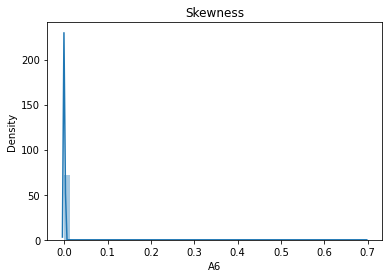

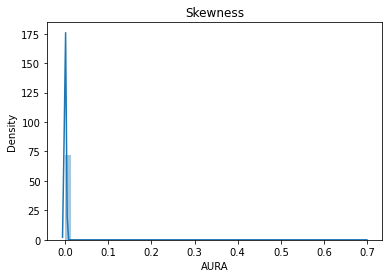

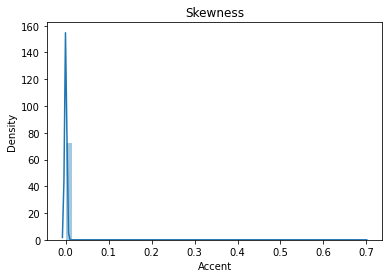

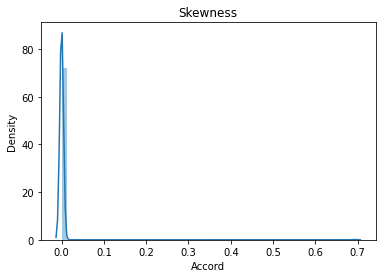

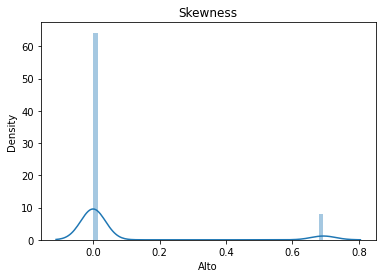

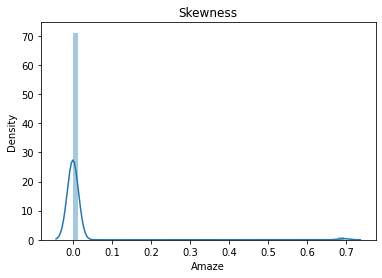

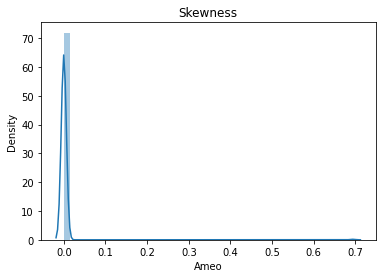

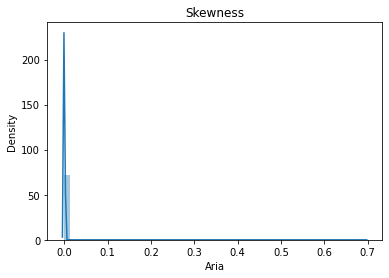

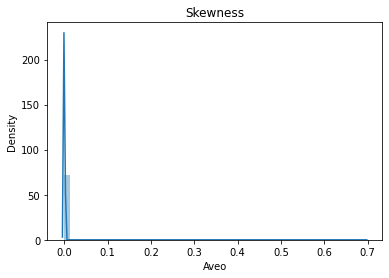

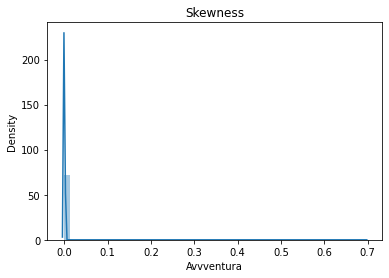

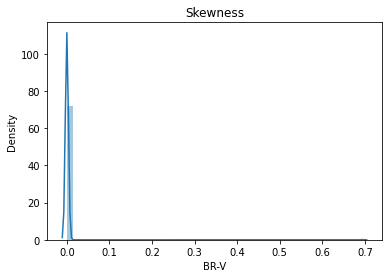

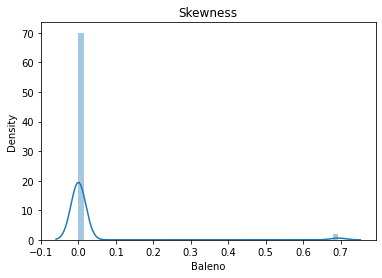

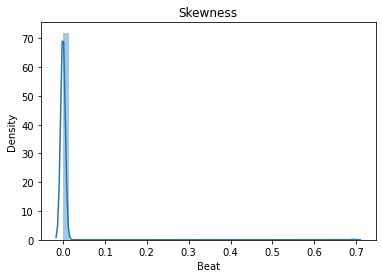

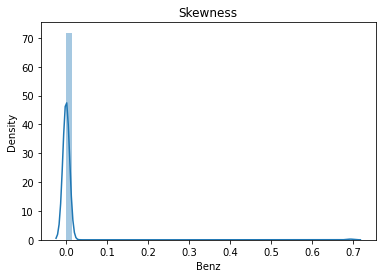

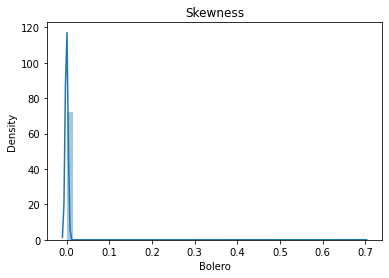

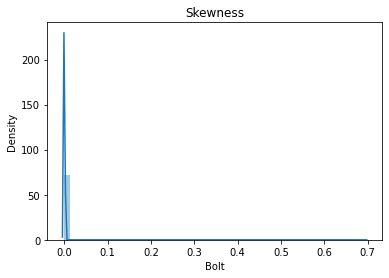

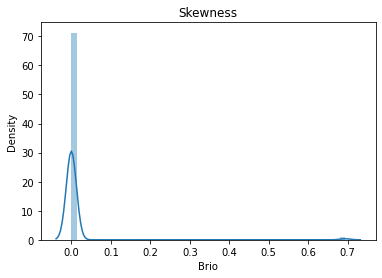

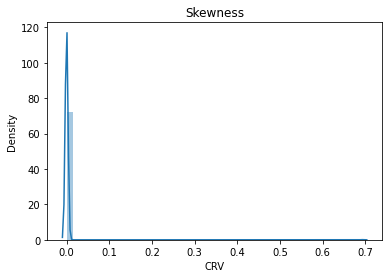

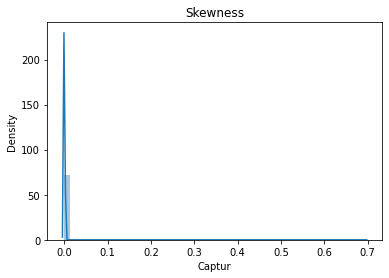

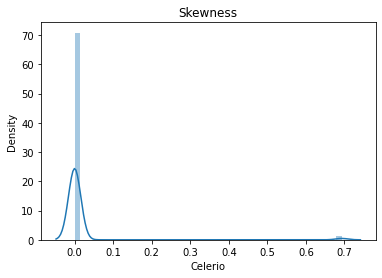

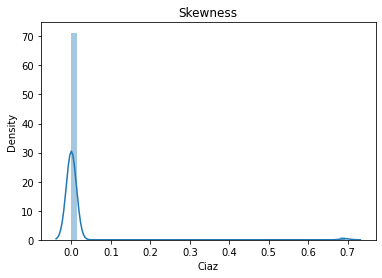

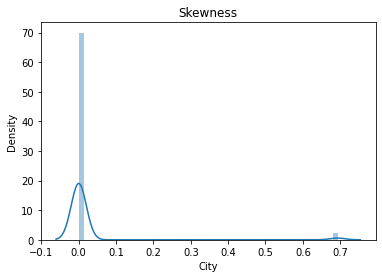

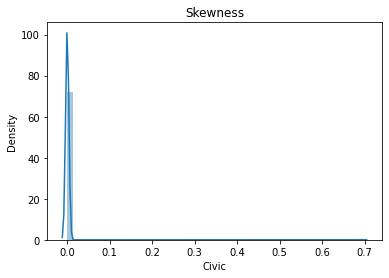

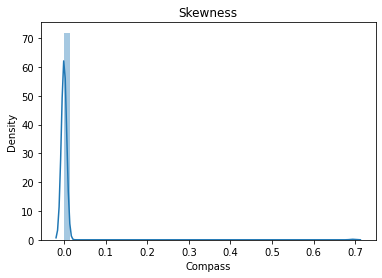

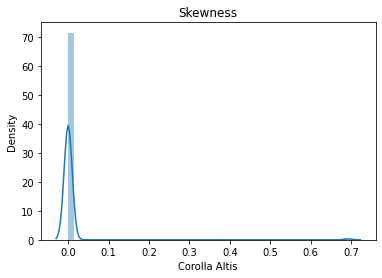

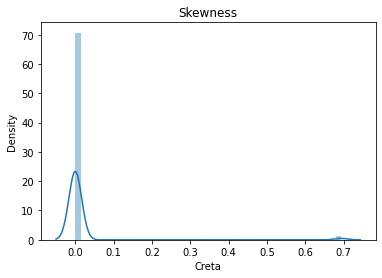

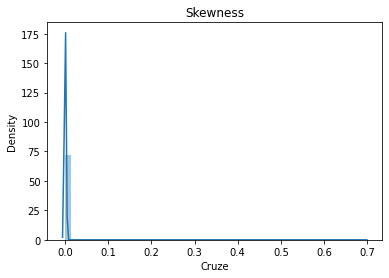

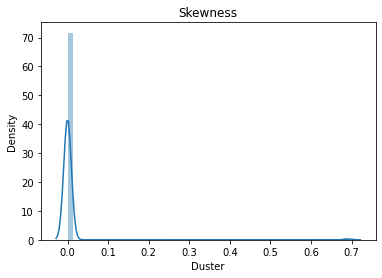

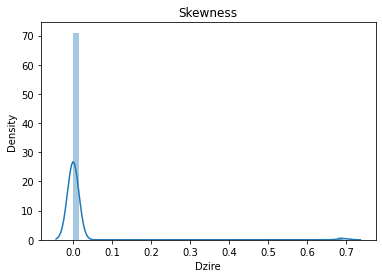

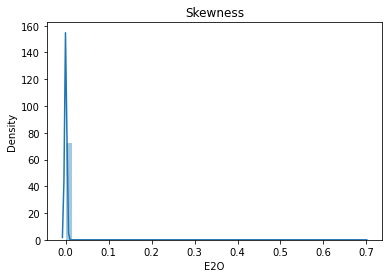

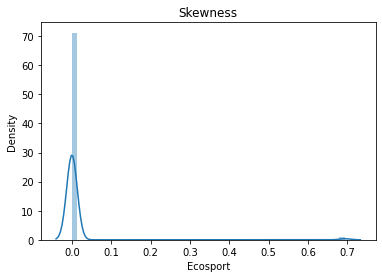

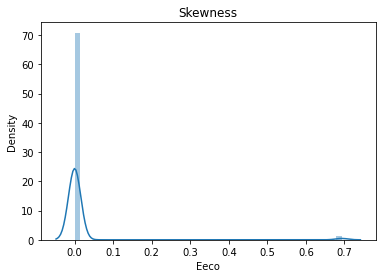

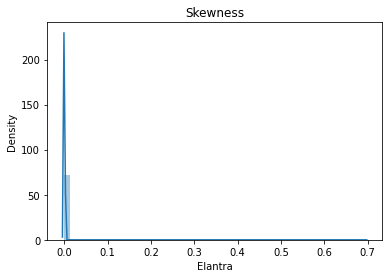

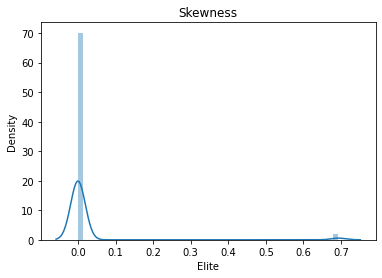

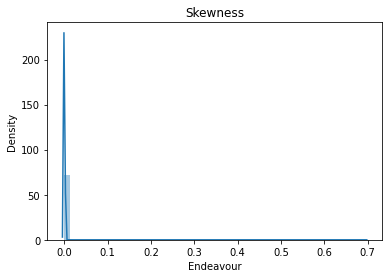

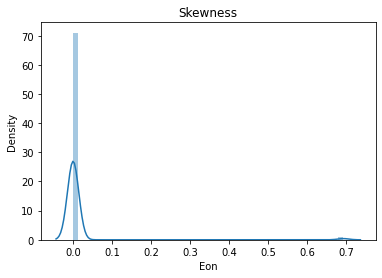

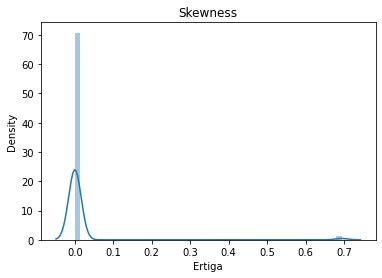

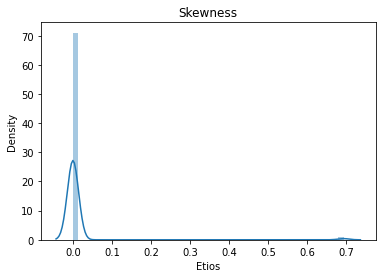

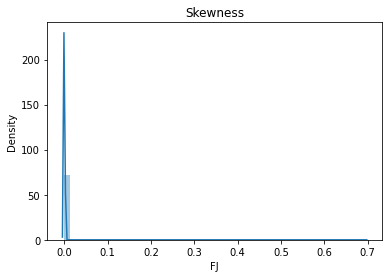

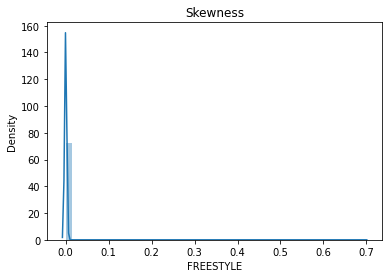

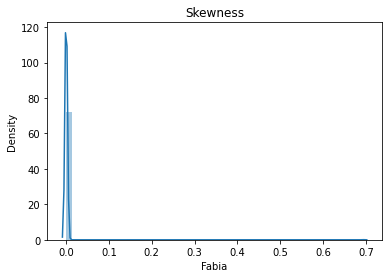

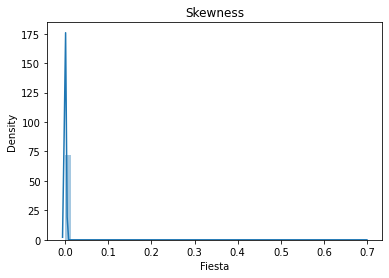

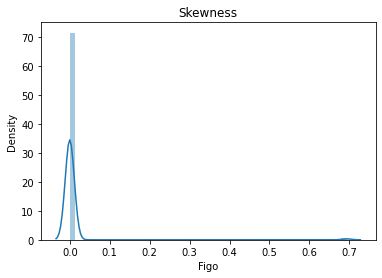

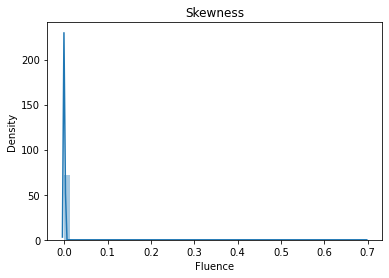

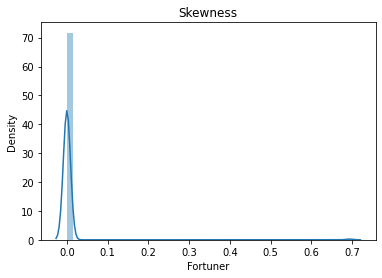

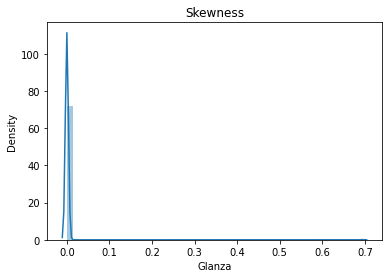

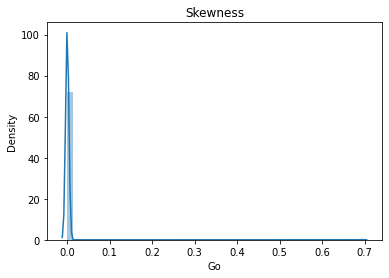

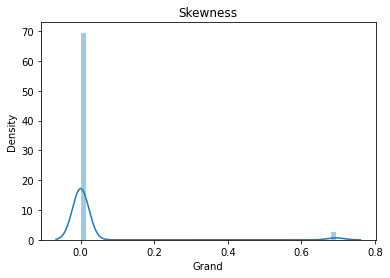

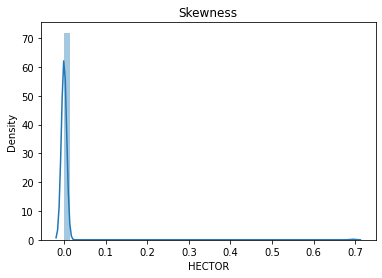

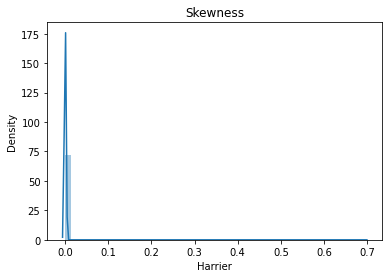

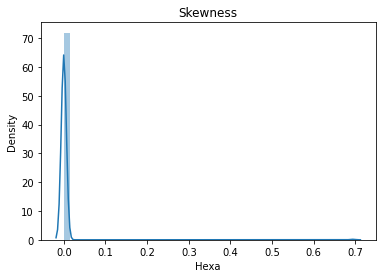

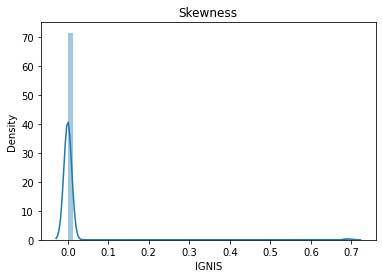

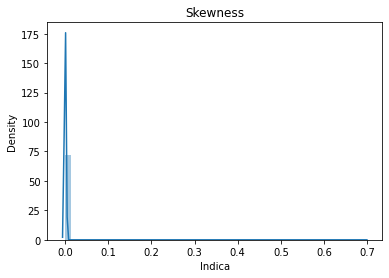

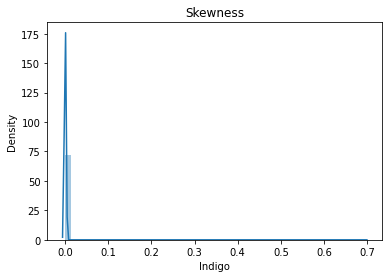

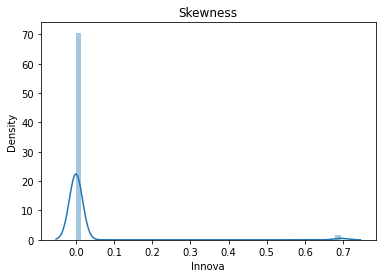

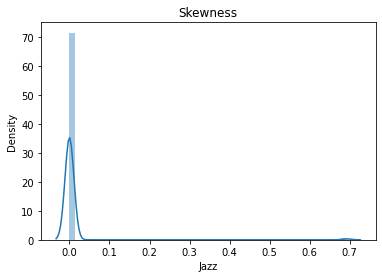

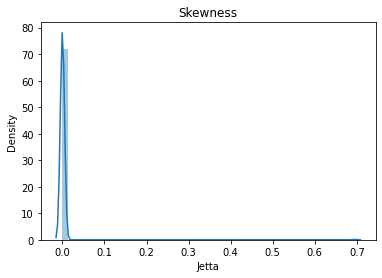

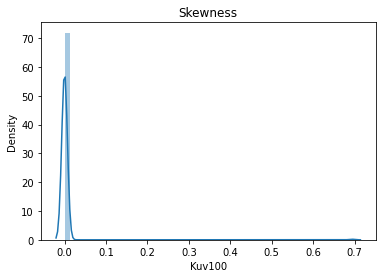

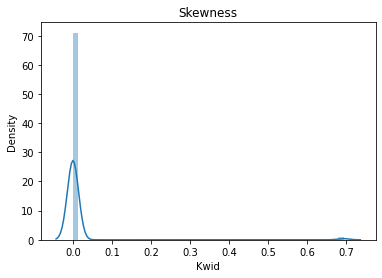

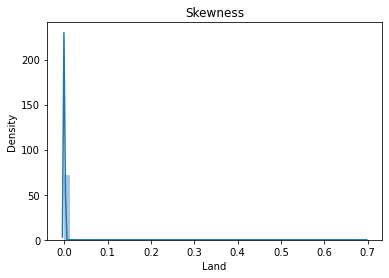

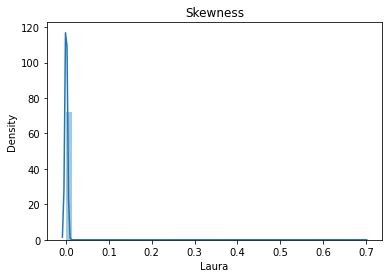

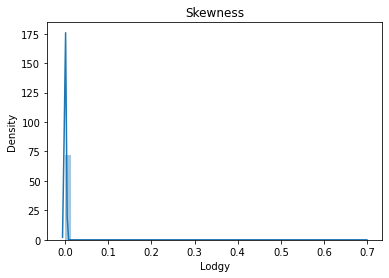

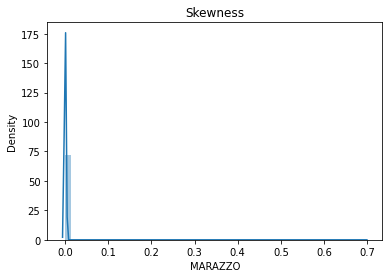

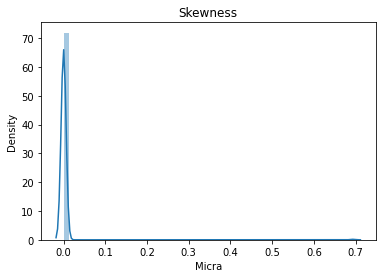

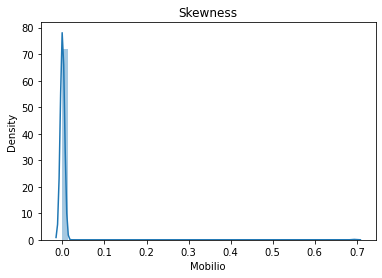

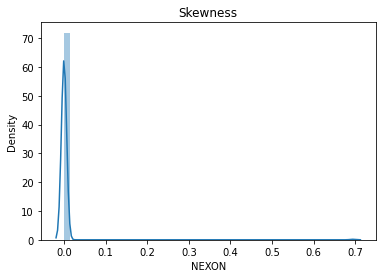

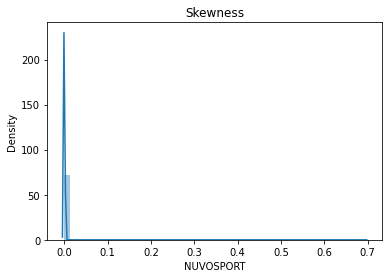

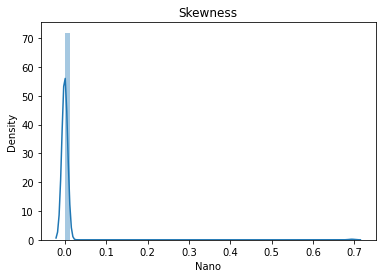

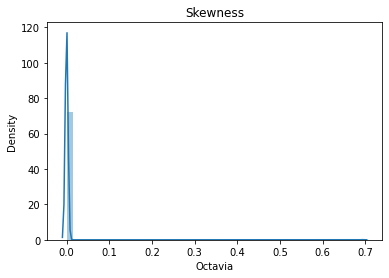

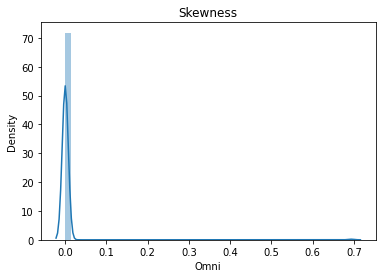

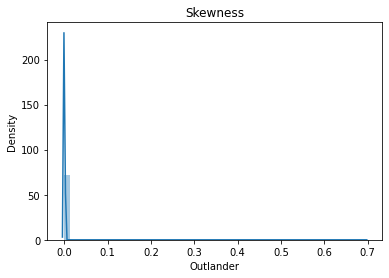

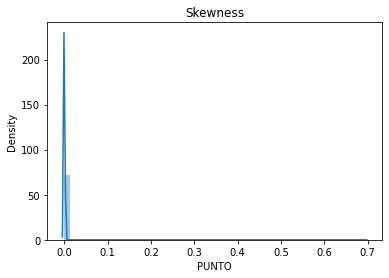

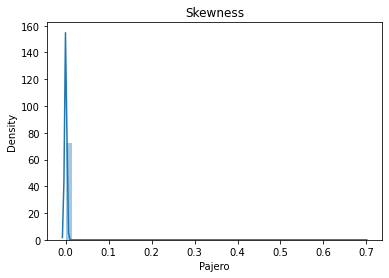

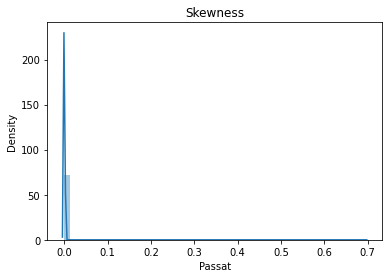

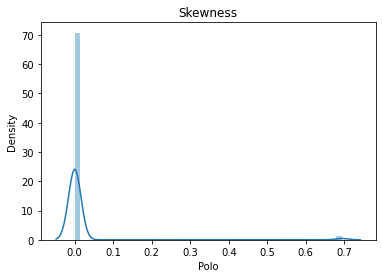

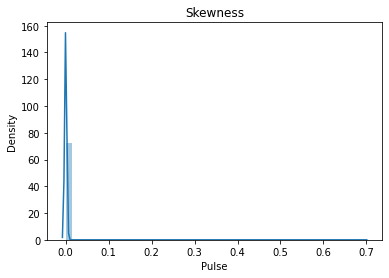

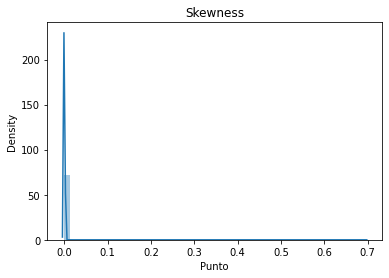

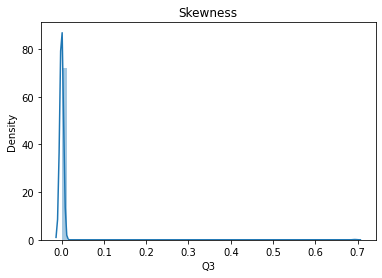

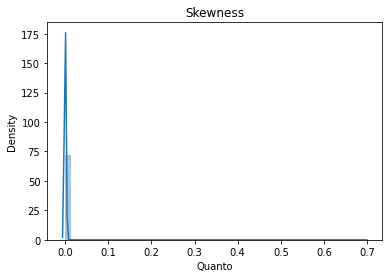

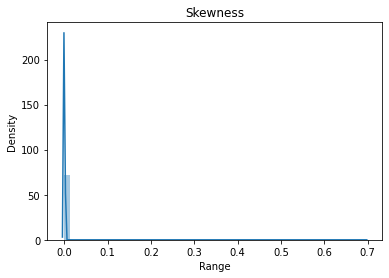

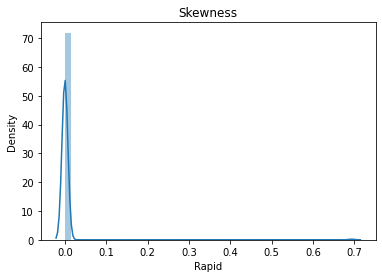

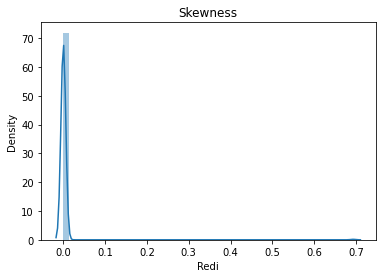

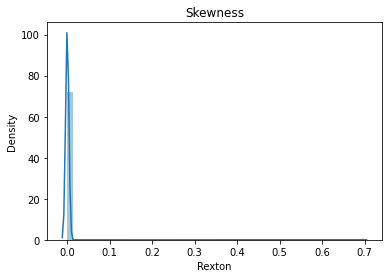

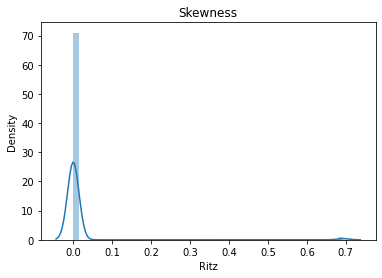

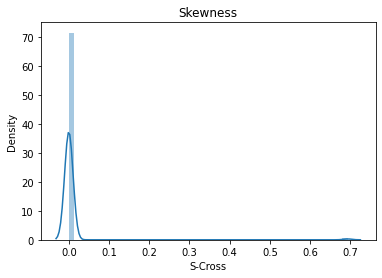

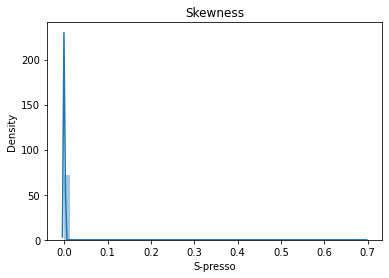

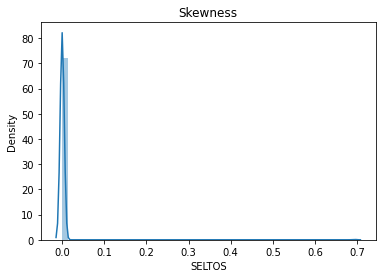

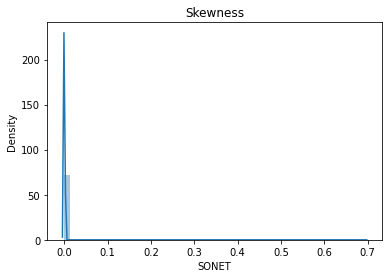

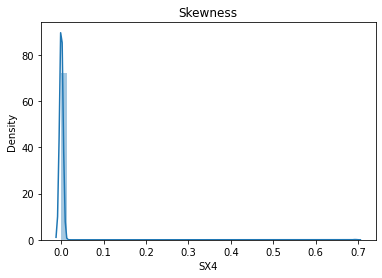

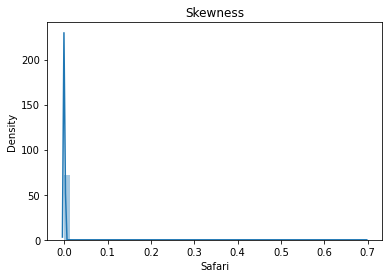

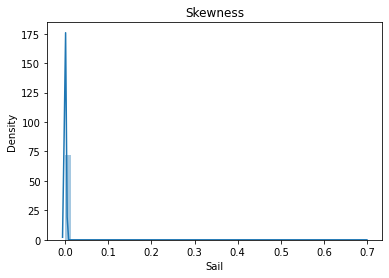

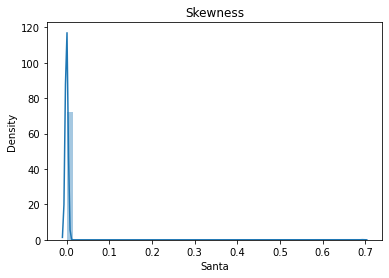

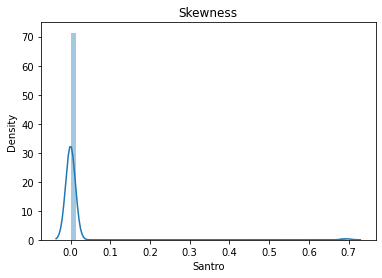

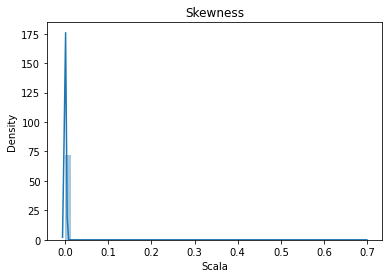

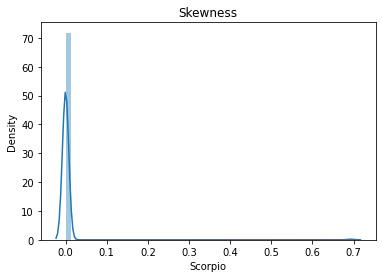

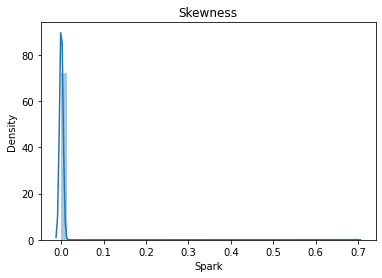

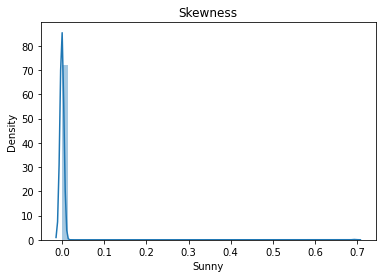

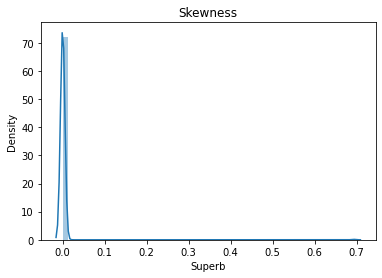

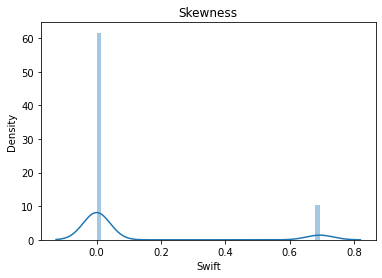

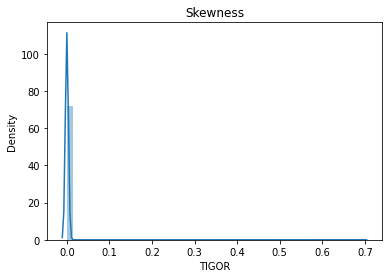

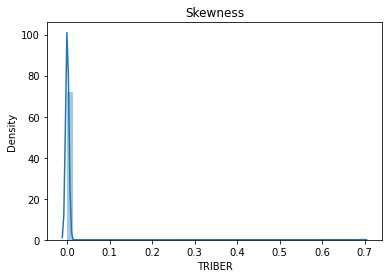

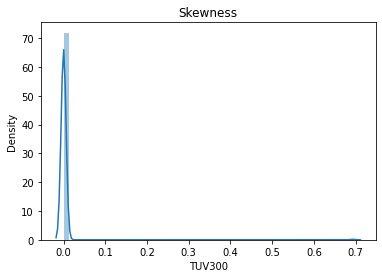

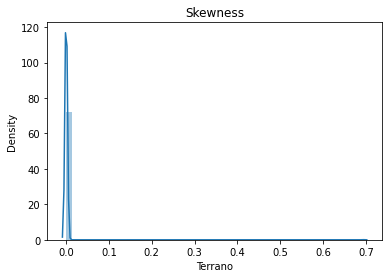

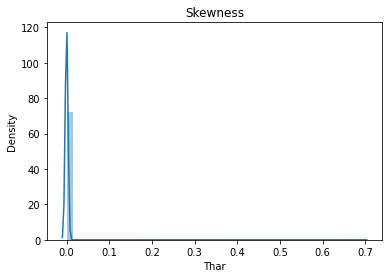

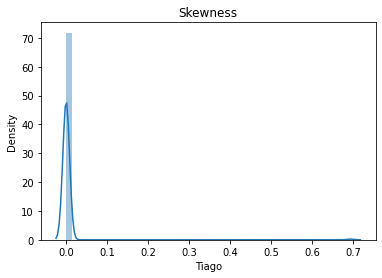

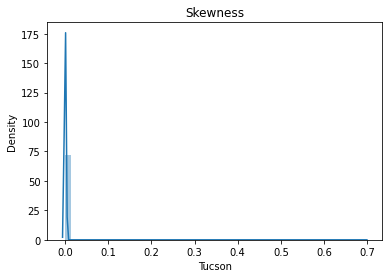

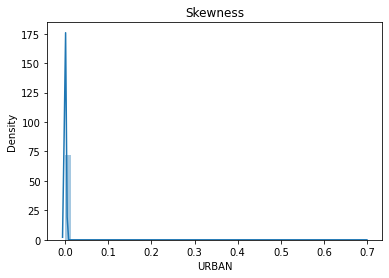

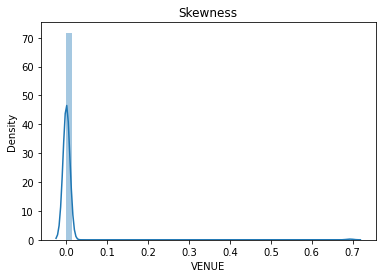

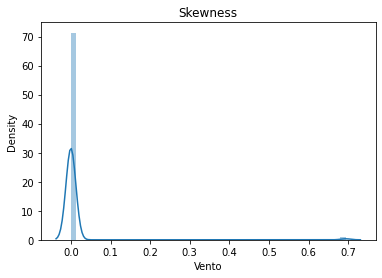

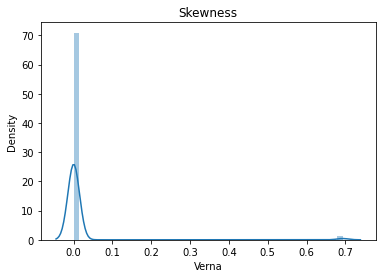

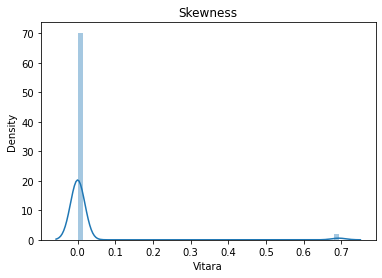

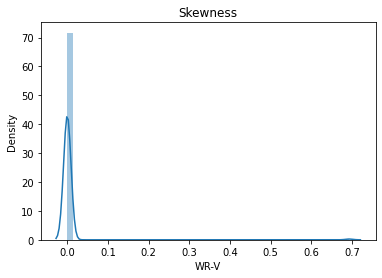

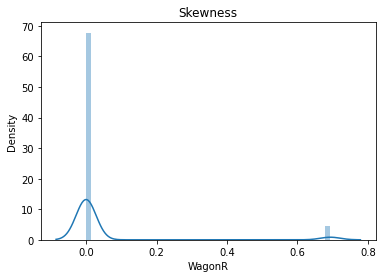

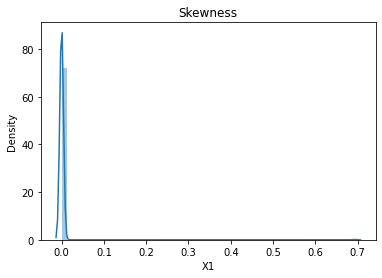

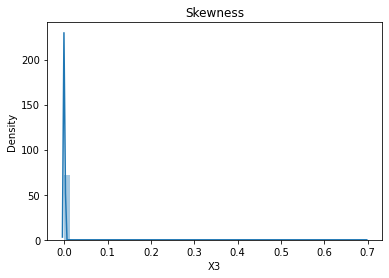

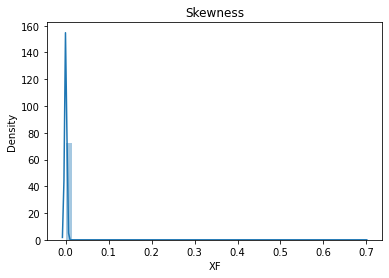

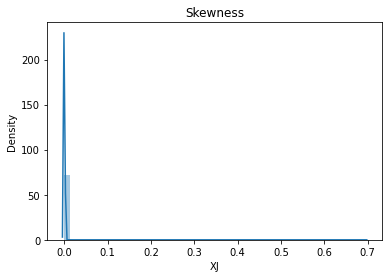

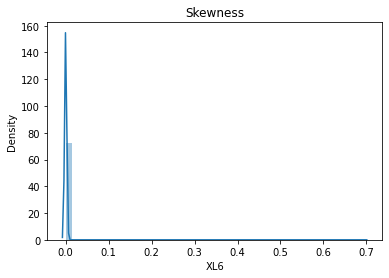

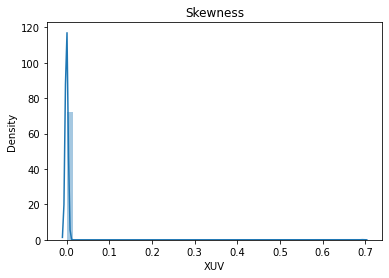

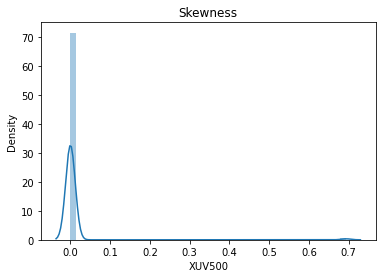

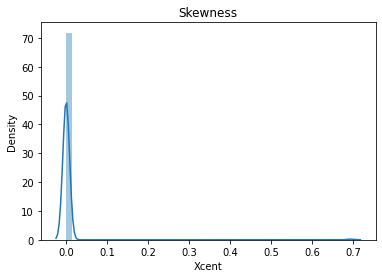

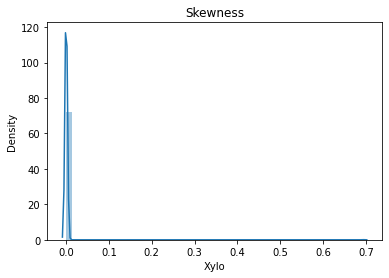

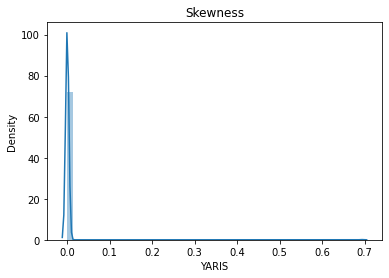

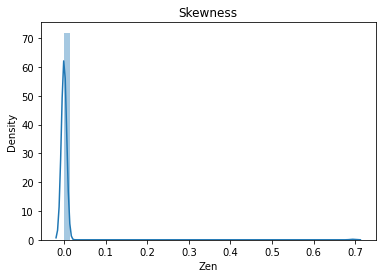

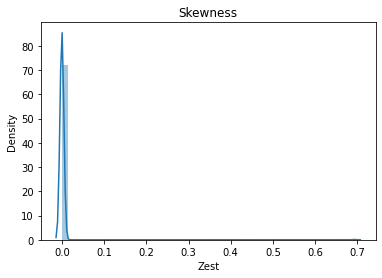

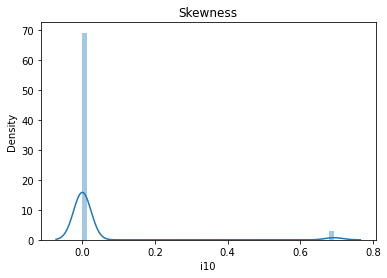

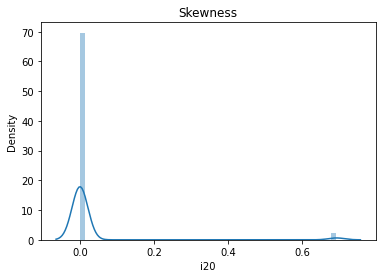

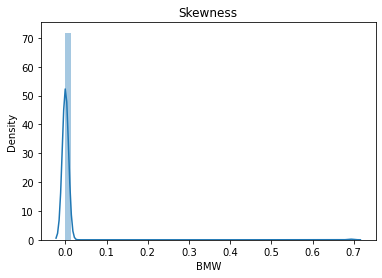

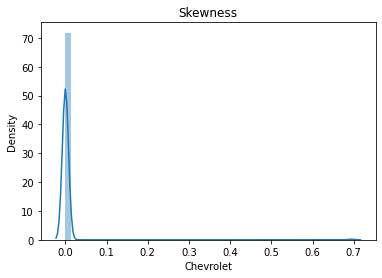

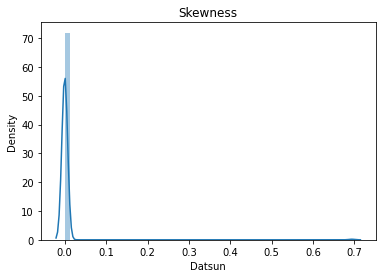

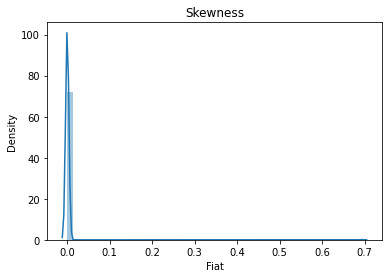

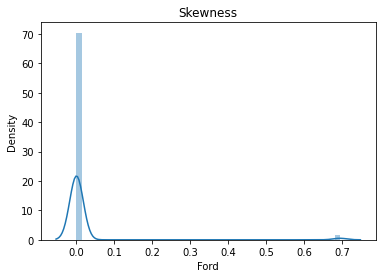

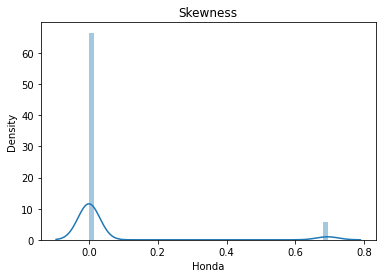

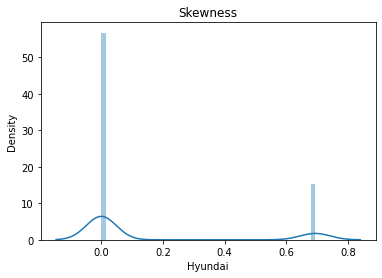

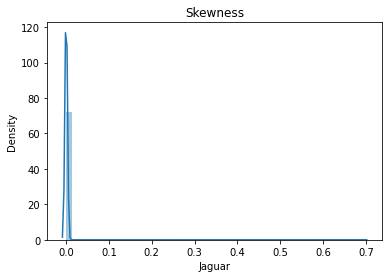

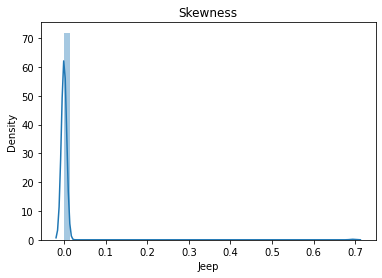

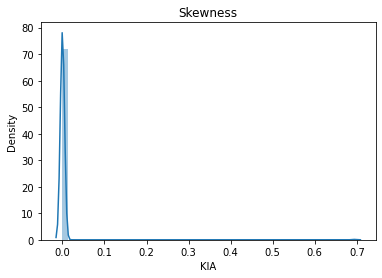

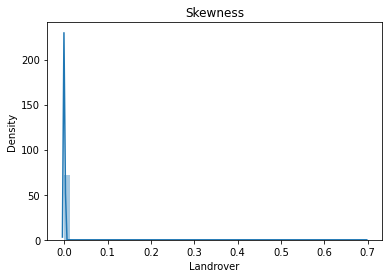

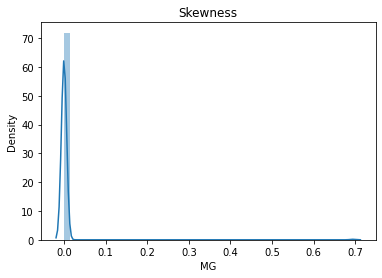

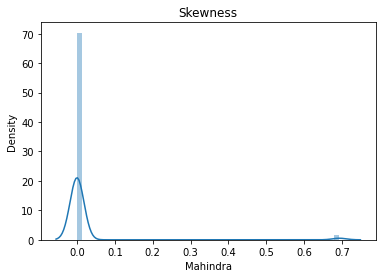

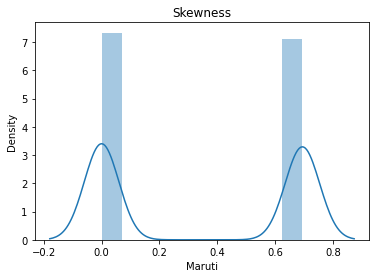

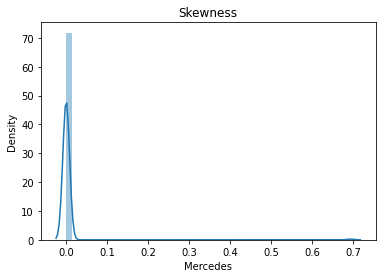

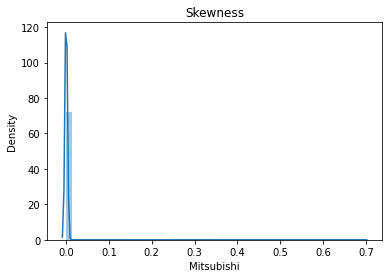

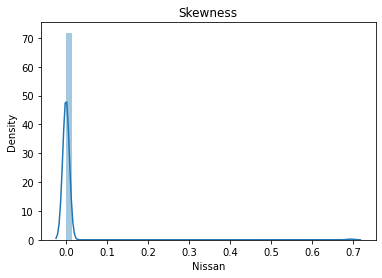

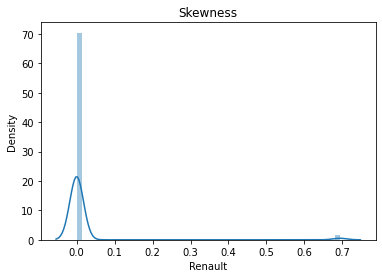

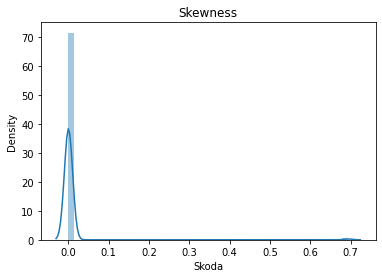

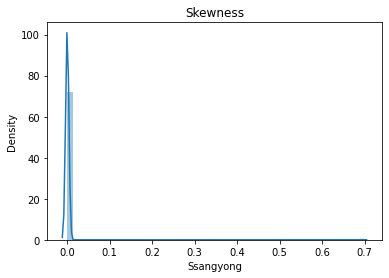

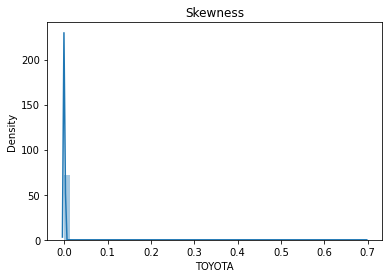

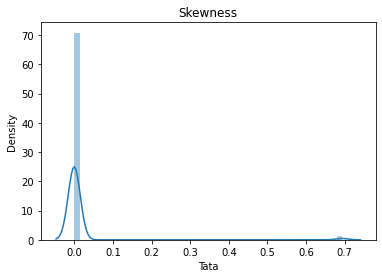

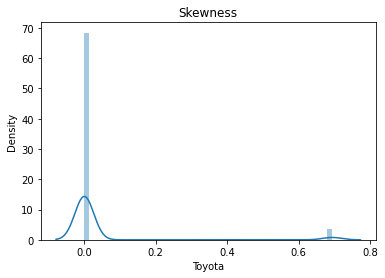

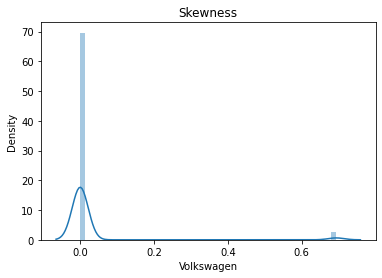

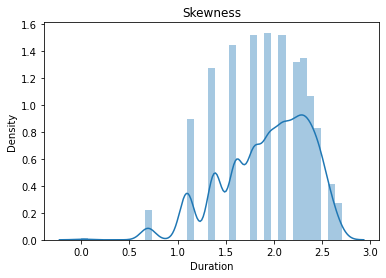

In [51]:
for column in df2.columns:

  sns.distplot(df2[column])
  plt.xlabel(column)
  plt.title("Skewness")
  plt.show()

After treating the skewed data by log transformation, the features were ploted.

In [61]:
df3=df2.copy()

In [62]:
# Dataset was divided x and y where x contain the independant features wereas y contain the dependant feature.
x= df3.drop('Price',axis=1)
y=df3['Price']

In [64]:
x

KM driven    Diesel  Electric    Petrol  Petrol + CNG  Petrol + LPG  \
0      8.273847  0.000000       0.0  0.693359           0.0           0.0   
1      7.600902  0.000000       0.0  0.693359           0.0           0.0   
2      8.052933  0.000000       0.0  0.693359           0.0           0.0   
3      7.187657  0.000000       0.0  0.693359           0.0           0.0   
4      8.172164  0.000000       0.0  0.693359           0.0           0.0   
...         ...       ...       ...       ...           ...           ...   
6700  10.782990  0.693359       0.0  0.000000           0.0           0.0   
6701  10.741276  0.000000       0.0  0.000000           0.0           0.0   
6702   9.188095  0.000000       0.0  0.693359           0.0           0.0   
6703  10.080838  0.000000       0.0  0.693359           0.0           0.0   
6704   8.643650  0.000000       0.0  0.693359           0.0           0.0   

      5 Series   A3   A4   A6  AURA  Accent  Accord      Alto  Amaze  Ameo  \
0          0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.000000    0.0   0.0   
1          0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.000000    0.0   0.0   
2          0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.000000    0.0   0.0   
3          0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.693359    0.0   0.0   
4          0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.000000    0.0   0.0   
...        ...  ...  ...  ...   ...     ...     ...       ...    ...   ...   
6700       0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.000000    0.0   0.0   
6701       0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.000000    0.0   0.0   
6702       0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.000000    0.0   0.0   
6703       0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.000000    0.0   0.0   
6704       0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.693359    0.0   0.0   

      Aria  Aveo  Avvventura  BR-V    Baleno  Beat  Benz  Bolero  Bolt  Brio  \
0      0.0   0.0         0.0   0.0  0.693359   0.0   0.0     0.0   0.0   0.0   
1      0.0   0.0         0.0   0.0  0.000000   0.0   0.0     0.0   0.0   0.0   
2      0.0   0.0         0.0   0.0  0.000000   0.0   0.0     0.0   0.0   0.0   
3      0.0   0.0         0.0   0.0  0.000000   0.0   0.0     0.0   0.0   0.0   
4      0.0   0.0         0.0   0.0  0.000000   0.0   0.0     0.0   0.0   0.0   
...    ...   ...         ...   ...       ...   ...   ...     ...   ...   ...   
6700   0.0   0.0         0.0   0.0  0.000000   0.0   0.0     0.0   0.0   0.0   
6701   0.0   0.0         0.0   0.0  0.000000   0.0   0.0     0.0   0.0   0.0   
6702   0.0   0.0         0.0   0.0  0.000000   0.0   0.0     0.0   0.0   0.0   
6703   0.0   0.0         0.0   0.0  0.000000   0.0   0.0     0.0   0.0   0.0   
6704   0.0   0.0         0.0   0.0  0.000000   0.0   0.0     0.0   0.0   0.0   

      CRV  Captur  Celerio  Ciaz  City  Civic  Compass  Corolla Altis  Creta  \
0     0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   
1     0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   
2     0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   
3     0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   
4     0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   
...   ...     ...      ...   ...   ...    ...      ...            ...    ...   
6700  0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   
6701  0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   
6702  0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   
6703  0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   
6704  0.0     0.0      0.0   0.0   0.0    0.0      0.0            0.0    0.0   

      Cruze  Duster     Dzire  E2O  Ecosport      Eeco  Elantra  Elite  \
0       0.0     0.0  0.000000  0.0       0.0  0.000000      0.0    0.0   
1       0.0     0.0  0.000000  0.0       0.0  0.693359      0.0    0.0   


In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=pd.DataFrame(scaler.transform(x),index=x.index,columns=x.columns)


After all the transformation, the independant features were scaled using standard scaler.

In [66]:
x

KM driven    Diesel  Electric    Petrol  Petrol + CNG  Petrol + LPG  \
0     -2.963130 -0.682603 -0.021243  0.737477     -0.176077     -0.057609   
1     -3.773286 -0.682603 -0.021243  0.737477     -0.176077     -0.057609   
2     -3.229087 -0.682603 -0.021243  0.737477     -0.176077     -0.057609   
3     -4.270790 -0.682603 -0.021243  0.737477     -0.176077     -0.057609   
4     -3.085545 -0.682603 -0.021243  0.737477     -0.176077     -0.057609   
...         ...       ...       ...       ...           ...           ...   
6700   0.057620  1.464981 -0.021243 -1.355975     -0.176077     -0.057609   
6701   0.007401 -0.682603 -0.021243 -1.355975     -0.176077     -0.057609   
6702  -1.862470 -0.682603 -0.021243  0.737477     -0.176077     -0.057609   
6703  -0.787698 -0.682603 -0.021243  0.737477     -0.176077     -0.057609   
6704  -2.517925 -0.682603 -0.021243  0.737477     -0.176077     -0.057609   

      5 Series        A3        A4        A6      AURA    Accent    Accord  \
0    -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   
1    -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   
2    -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   
3    -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   
4    -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   
...        ...       ...       ...       ...       ...       ...       ...   
6700 -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   
6701 -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   
6702 -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   
6703 -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   
6704 -0.027429 -0.012263 -0.034703 -0.012263 -0.017344 -0.021243 -0.036811   

          Alto     Amaze      Ameo      Aria      Aveo  Avvventura      BR-V  \
0    -0.349775 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   
1    -0.349775 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   
2    -0.349775 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   
3     2.858985 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   
4    -0.349775 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   
...        ...       ...       ...       ...       ...         ...       ...   
6700 -0.349775 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   
6701 -0.349775 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   
6702 -0.349775 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   
6703 -0.349775 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   
6704  2.858985 -0.122291 -0.052093 -0.012263 -0.012263   -0.012263 -0.030049   

        Baleno      Beat      Benz    Bolero      Bolt      Brio       CRV  \
0     5.815668 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   
1    -0.171949 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   
2    -0.171949 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   
3    -0.171949 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   
4    -0.171949 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   
...        ...       ...       ...       ...       ...       ...       ...   
6700 -0.171949 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   
6701 -0.171949 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   
6702 -0.171949 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   
6703 -0.171949 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   
6704 -0.171949 -0.045928 -0.069531 -0.027429 -0.012263 -0.109639 -0.027429   

        Captur   Celerio      Ciaz      City     Civic   Compass  \
0    -0.012263 -0.137266 -0.109639 -0.175167 -0.032459 -0.053525   
1    -0.012263 -0.137266 -0.109639 -0.175167 -0.032459 -0.053525   
2    -0.012263 -0.137266 -0.109639 -0.1751

In [55]:
!pip install pycaret

In [56]:
from pycaret.regression import setup, compare_models

In [67]:
a=setup(data=pd.concat([x,y],axis=1),target='Price')

Description             Value
0                               session_id              4634
1                                   Target             Price
2                            Original Data       (6651, 162)
3                           Missing Values             False
4                         Numeric Features                 8
5                     Categorical Features               153
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set       (4655, 149)
10                    Transformed Test Set       (1996, 149)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              dd89
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [68]:
compare_models()

Model           MAE           MSE  \
br                         Bayesian Ridge  1.464000e-01  3.730000e-02   
ridge                    Ridge Regression  1.474000e-01  3.780000e-02   
rf                Random Forest Regressor  1.301000e-01  3.800000e-02   
knn                 K Neighbors Regressor  1.412000e-01  3.930000e-02   
et                  Extra Trees Regressor  1.255000e-01  4.050000e-02   
huber                     Huber Regressor  1.517000e-01  4.260000e-02   
lightgbm  Light Gradient Boosting Machine  1.462000e-01  4.510000e-02   
gbr           Gradient Boosting Regressor  1.651000e-01  5.120000e-02   
par          Passive Aggressive Regressor  1.765000e-01  5.290000e-02   
dt                Decision Tree Regressor  1.433000e-01  5.560000e-02   
omp           Orthogonal Matching Pursuit  1.965000e-01  7.230000e-02   
lr                      Linear Regression  1.535000e-01  8.560000e-02   
ada                    AdaBoost Regressor  2.730000e-01  1.214000e-01   
lasso                    Lasso Regression  3.932000e-01  2.447000e-01   
en                            Elastic Net  3.932000e-01  2.447000e-01   
llar         Lasso Least Angle Regression  3.932000e-01  2.447000e-01   
lar                Least Angle Regression  1.319130e+13  2.743794e+29   

                  RMSE            R2   RMSLE          MAPE  TT (Sec)  
br        1.930000e-01  8.467000e-01  0.0138  1.130000e-02     0.113  
ridge     1.943000e-01  8.446000e-01  0.0139  1.140000e-02     0.034  
rf        1.944000e-01  8.437000e-01  0.0139  1.010000e-02     2.443  
knn       1.981000e-01  8.387000e-01  0.0142  1.090000e-02     0.197  
et        2.008000e-01  8.342000e-01  0.0144  9.700000e-03     2.647  
huber     2.060000e-01  8.250000e-01  0.0146  1.170000e-02     1.026  
lightgbm  2.114000e-01  8.156000e-01  0.0151  1.130000e-02     0.174  
gbr       2.257000e-01  7.902000e-01  0.0160  1.270000e-02     0.906  
par       2.240000e-01  7.835000e-01  0.0160  1.360000e-02     0.101  
dt        2.345000e-01  7.713000e-01  0.0167  1.110000e-02     0.062  
omp       2.687000e-01  7.027000e-01  0.0190  1.510000e-02     0.035  
lr        2.667000e-01  6.466000e-01  0.0242  1.180000e-02     0.362  
ada       3.482000e-01  5.009000e-01  0.0249  2.120000e-02     0.652  
lasso     4.943000e-01 -2.500000e-03  0.0352  3.020000e-02     0.034  
en        4.943000e-01 -2.500000e-03  0.0352  3.020000e-02     0.034  
llar      4.943000e-01 -2.500000e-03  0.0352  3.020000e-02     0.035  
lar       1.660272e+14 -1.099479e+30  7.8831  9.824686e+11     0.074

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

We tried to get the best model that can fit our dataset, and from the above,we finally selected the top 5 models.

**Models used**

In [81]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import BayesianRidge,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [85]:
model1=BayesianRidge()
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
mse1=mean_squared_error(y_test,pred1)
r2s1=r2_score(y_test,pred1)
mae1=mean_absolute_error(y_test,pred1)
print("R2_score",r2s1)
print("Mean Squared error",mse1)
print("Mean Absolute eroor",mae1)


R2_score 0.8300709784528388
Mean Squared error 0.041121767815490984
Mean Absolute eroor 0.14698163584943166


In [86]:
model2=ExtraTreesRegressor()
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)
mse2=mean_squared_error(y_test,pred2)
r2s2=r2_score(y_test,pred2)
mae2=mean_absolute_error(y_test,pred2)
print("R2_score",r2s2)
print("Mean Squared error",mse2)
print("Mean Absolute eroor",mae2)

R2_score 0.8424234955003532
Mean Squared error 0.03813253540927836
Mean Absolute eroor 0.11833459915376818


In [87]:
model3=RandomForestRegressor()
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)
mse3=mean_squared_error(y_test,pred3)
r2s3=r2_score(y_test,pred3)
mae3=mean_absolute_error(y_test,pred3)
print("R2_score",r2s3)
print("Mean Squared error",mse3)
print("Mean Absolute eroor",mae3)

R2_score 0.8525699260297657
Mean Squared error 0.0356771622388355
Mean Absolute eroor 0.12189087448876959


In [88]:
model4=Ridge()
model4.fit(x_train,y_train)
pred4=model4.predict(x_test)
mse4=mean_squared_error(y_test,pred4)
r2s4=r2_score(y_test,pred4)
mae4=mean_absolute_error(y_test,pred4)
print("R2_score",r2s4)
print("Mean Squared error",mse4)
print("Mean Absolute eroor",mae4)

R2_score 0.8299491454842598
Mean Squared error 0.041151250637204234
Mean Absolute eroor 0.1470402985263135


In [89]:
model5=KNeighborsRegressor()
model5.fit(x_train,y_train)
pred5=model5.predict(x_test)
mse5=mean_squared_error(y_test,pred5)
r2s5=r2_score(y_test,pred5)
mae5=mean_absolute_error(y_test,pred5)
print("R2_score",r2s5)
print("Mean Squared error",mse5)
print("Mean Absolute eroor",mae5)

R2_score 0.8298140646881477
Mean Squared error 0.04118393935090058
Mean Absolute eroor 0.13787823192359502


From the above models, we get the best score from Random forest regressor.

**HYPERPARAMETER TUNING**

In [90]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [91]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [92]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [94]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [95]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Average Error: 0.2909 degrees.
Accuracy = 97.77%.


After hyperparameter tuning, we got pretty good accuracy on our test set. Hence we can conclude that our model is performing good.

In [96]:
import pickle

In [97]:
filename="Car_price_prediction.pkl"
pickle.dump(best_grid,open(filename,'wb'))